+ https://github.com/orgs/datacamp/repositories?page=2

+ https://rpubs.com/Sergio_Garcia/working_with_dates_and_times

###**Introduction aux dates**

####**1. Introduction aux dates**

+ Bienvenue dans travailler avec les dates et heures dans R. 

+ Dans ce cours, vous maîtriserez l’importation, la manipulation et l’informatique avec des dates et des heures pour explorer la météo, planifier des réunions et calculer les règnes des monarques. 

+ Dans ce chapitre, vous découvrirez les objets intégrés de R pour la gestion des dates et des heures.

####**2. Dates**

+ Commençons par les dates. 

+ Là où j’ai grandi en Nouvelle-Zélande, nous mettons toujours le jour du mois en premier, puis le mois, puis l’année. 

+ Mais aux États-Unis, la convention est le mois d’abord, puis le jour du mois, puis l’année. Cela peut prêter à confusion, l’un d’eux doit sûrement être plus correct?

####**3. Le format de date numérique standard mondial**

+ Il s’avère qu’il existe une norme mondiale appelée ISO 8601, qui spécifie la bonne façon de partager les dates pour éviter toute confusion. 

+ Il dit ordonner les composants en unités décroissantes, c’est-à-dire année, mois puis jour. 

+ Il s’avère que les conventions des États-Unis et de la Nouvelle-Zélande sont fausses. 

+ Tous ces autres formats ne sont pas non plus conformes à la norme ISO 8601. S’il vous plaît, n’essayez pas de donner des dates R peintes sur un chat noir.

  + https://xkcd.com/1179/

####**4.ISO 8601 AAAA-MM-JJ**

+ La norme ISO 8601 spécifie l’ordre des composants, mais aussi quelques autres détails sur la date. 

+ Par exemple, chaque composant a un nombre fixe de chiffres : **l’année a quatre et le jour et le mois deux**. 

+ Si vous n’avez besoin que d’un chiffre pour le jour ou le mois, vous devez le remplir avec des zéros non significatifs. 

+ Vous n’avez pas besoin d’utiliser un séparateur dans la norme ISO, mais si vous le faites, il doit s’agir d’un tiret dans les dates. 

+ Ainsi, la date, le 1er janvier 2011, dans la norme ISO 8601 est 2011 (tiret) 01 (tiret) 01.

####**5. Dates en R**

+ Si vous avez une date au format ISO 8601, il faut encore un peu de travail pour que R la reconnaisse comme une date. 

+ Si vous essayez simplement de le saisir sur la console, R interprétera les tirets comme une soustraction et vous vous retrouverez avec quelque chose d’un peu surprenant. 

+ Vous pourriez penser que l’utilisation de guillemets aidera. 

+ Cela ressemble certainement à une date, mais R pense toujours que c’est juste une chaîne de caractères. 

+ Le secret pour que R reconnaisse les dates, c’est de lui dire explicitement « ceci est une date » avec la fonction **as.Date**. 

+ **as.Date** prend une chaîne de caractères et la transforme en objet de date. 

+ Cela ne fonctionnera qu’avec les dates dans l’ordre ISO, mais vous verrez comment gérer d’autres formats dans le chapitre 2. 

+ Il existe également quelques packages qui importeront automatiquement des dates dans un plus large éventail de formats. Vous verrez deux exemples dans les exercices: readr et anytime

####**6. Entraînons-nous!**
+ Très bien, mettons quelques dates dans R.

In [ ]:
install.packages("readr")
install.packages("anytime")
install.packages("ggplot2")
install.packages("dplyr")
install.packages("ggridges")

In [ ]:
library(readr)
library(anytime)
library(ggplot2)
library(dplyr)
library(ggridges)

###**EXERCICE**

####**Reconnaître les dates ISO 8601**

+ Laquelle des propositions suivantes est la manière correcte de spécifier le 4 octobre 2004 selon la norme ISO 8601 ?

####**Instructions**


+ 4-10-2004

+ 2004-10-4

+ 10-04-2004

+ **2004-10-04**

####**Spécifier des dates**

+ Comme vous l'avez vu dans la partie, R ne sait pas qu'un élément est une date si vous ne le lui dites pas. 

+ Si vous disposez d'une chaîne de caractères qui représente une date au sens de la norme ISO 8601, vous pouvez la transformer en date à l'aide de **la fonction as.Date()**. 

+ Il suffit de passer la chaîne de caractères (ou un vecteur de chaînes de caractères) comme premier argument.

+ Dans cet exercice, vous allez convertir une chaîne de caractères représentant une date en un objet Date.

####**Instructions**

+ Nous avons stocké la chaîne "2013-04-03" dans une variable appelée $x$.

+ Utilisez **str()** pour examiner la structure de $x$ et confirmer qu'il s'agit d'une simple chaîne de caractères.

+ Convertissez x en une date en utilisant **as.Date()**.

+ Utilisez **str()** pour examiner la structure de x_date et confirmer qu'il s'agit d'une date.

+ Utilisez maintenant **as.Date()** pour stocker la date du 10 avril 2014.

In [ ]:
# The date R 3.0.0 was released
x <- "2013-04-03"

# Examine structure of x
str(x)

# Use as.Date() to interpret x as a date
x_date <- as.Date(x)

# Examine structure of x_date
str(x_date)

# Store April 10 2014 as a Date
april_10_2014 <- as.Date("2014-04-10")
april_10_2014

 chr "2013-04-03"
 Date[1:1], format: "2013-04-03"


[1] "2014-04-10"

####**Importation automatique**
+ Vous aurez parfois besoin de saisir quelques dates à la main en utilisant **as.Date()**, mais il est beaucoup plus courant d'avoir une colonne de dates dans un fichier de données.

+ Certaines fonctions qui lisent des données reconnaissent et analysent automatiquement les dates dans différents formats. 

+ En particulier, les fonctions d'importation, comme **read_csv()**, du paquet readr reconnaissent les dates dans quelques formats courants.

+ Il existe également la **fonction anytime() du package anytime** dont le seul but est d'analyser automatiquement les chaînes de caractères comme des dates, quel que soit le format.

+ Essayez-les toutes les deux dans cet exercice.

####**Instructions**

+ Utilisez read_csv() pour lire le fichier CSV rversions.csv en tant que releases.

+ Utilisez str() pour examiner la structure de la colonne date. Remarquez que c'est déjà un objet Date.
+ Nous avons chargé anytime et créé un objet appelé sep_10_2009. Utilisez la fonction anytime() pour analyser sep_10_2009.

In [ ]:
# Load the readr package
library(readr)

# Use read_csv() to import rversions.csv
releases <- read_csv("/content/rversions.csv")
head(releases)

# Examine the structure of the date column
str(releases$date)

# Load the anytime package
library(anytime)

# Various ways of writing Sep 10 2009
sep_10_2009 <- c("September 10 2009", "2009-09-10", "10 Sep 2009", "09-10-2009")

# Use anytime() to parse sep_10_2009
anytime(sep_10_2009)

###**Pourquoi utiliser des dates?**

####**1. Pourquoi utiliser des dates?**

+ Comme vous l’avez vu dans les exercices, c’est juste un peu de travail supplémentaire pour que les dates soient reconnues comme des dates par R, mais ce travail supplémentaire paie vraiment. 

+ Une fois qu’un objet est une date, vous pouvez tracer et faire des mathématiques avec lui et obtenir les résultats que vous attendez.

####**2. Les dates agissent comme des chiffres**

+ Dans les coulisses Les objets Date sont stockés en tant que nombre de jours depuis le 1er janvier 1970. 

+ Cela signifie que les comparaisons mathématiques standard fonctionnent comme prévu. 

+ Vous pouvez demander si une date est supérieure à une autre, ce qui sera vrai si elle se produit après l’autre. Vous pouvez ajouter des jours à une date. Et vous pouvez trouver la différence entre les dates.

####**3. Tracé avec dates**
+ Cela signifie également que des bibliothèques de traçage peuvent être construites pour tracer des dates. La fonction de tracé de base R acceptera volontiers les dates,

####**4. Tracé avec dates**


+ tout comme ggplot2. 

+ Vous verrez dans les exercices que si vous devez définir les propriétés de l’axe, vous devrez le faire avec des objets de date. 

+ Bien sûr, tout cela sera plus intéressant lorsque vos dates feront partie d’un ensemble de données plus large.

####**5. Rejets R**
+ Examinons de plus près les données que vous avez importées dans les exercices précédents. 

+ releases est un ensemble de données qui décrit les dates de sortie de toutes les versions de R. 

+ La première version 0 (point) 60 est sortie le 4 décembre 1997. 

+ Les numéros de version R se présentent sous la forme : numéro de version majeure, point, numéro de version mineure, point, numéro de correctif. Ces numéros sont stockés dans les colonnes majeure, mineure et patch. 

+ Lorsqu’une version est un correctif, seul le numéro de correctif augmente, s’il s’agit d’une version mineure, le nombre mineur augmente et le numéro de correctif est remis à zéro, s’il s’agit d’une version majeure, le numéro majeur augmente et les numéros mineurs et correctifs sont remis à zéro. Vous pouvez voir le type de libération dans la colonne type.

####**6. Entraînons-nous!**
+ Dans les exercices, vous allez tracer les dates de sortie pour explorer quand les versions ont eu lieu et soustraire les dates pour voir combien de temps s’est écoulé depuis la dernière version.

###**EXERCICES**

###**Tracer**

+ Si vous tracez une date sur l'axe d'un graphique, vous vous attendez à ce que les dates soient dans l'ordre du calendrier, et c'est exactement ce qui se passe avec **plot() ou ggplot()**.

+ Dans cet exercice, vous allez réaliser quelques tracés avec les données des versions R des exercices précédents en utilisant ggplot2. 

+ Il y a deux grandes différences lorsqu'une date se trouve sur un axe :

  + 1) Si vous spécifiez des limites, elles doivent être des **objets Date**.

  + 2) Pour contrôler le comportement de l'échelle, vous utilisez **la fonction scale_x_date()**.

+ Essayez dans cet exercice d'explorer la fréquence des mises à jour de R.

####**Instructions**

+ Créez un graphique des versions en fonction du temps en définissant l'argument $x$ de la fonction aes() sur la colonne de la date.


+ Zoomez sur la période de 2010 à 2014 en spécifiant les limites de **"2010-01-01" à "2014-01-01"**.

+ Notez que ces chaînes doivent être enveloppées dans **as.Date()** pour être interprétées comme des objets Date.


+ Ajustez l'étiquetage de l'axe en spécifiant des ruptures de date de "10 ans" et des étiquettes de date de "%Y".

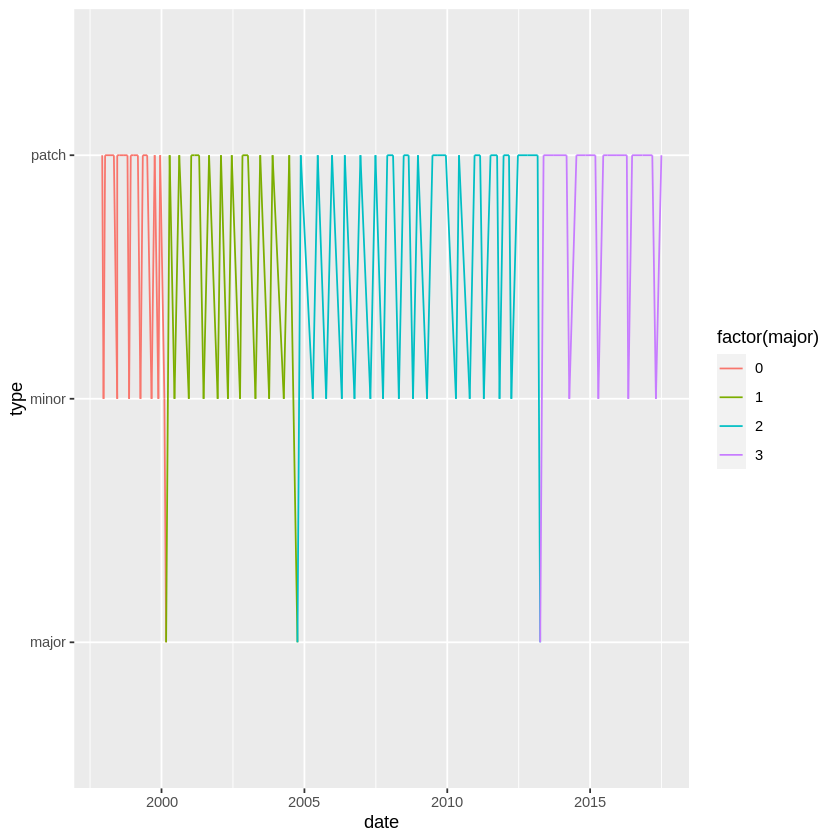

In [ ]:
library(ggplot2)

# Set the x axis to the date column
ggplot(releases, aes(x = date, y = type)) +
  geom_line(aes(group = 1, color = factor(major)))

Warning message:
“Removed 87 rows containing missing values (`geom_line()`).”


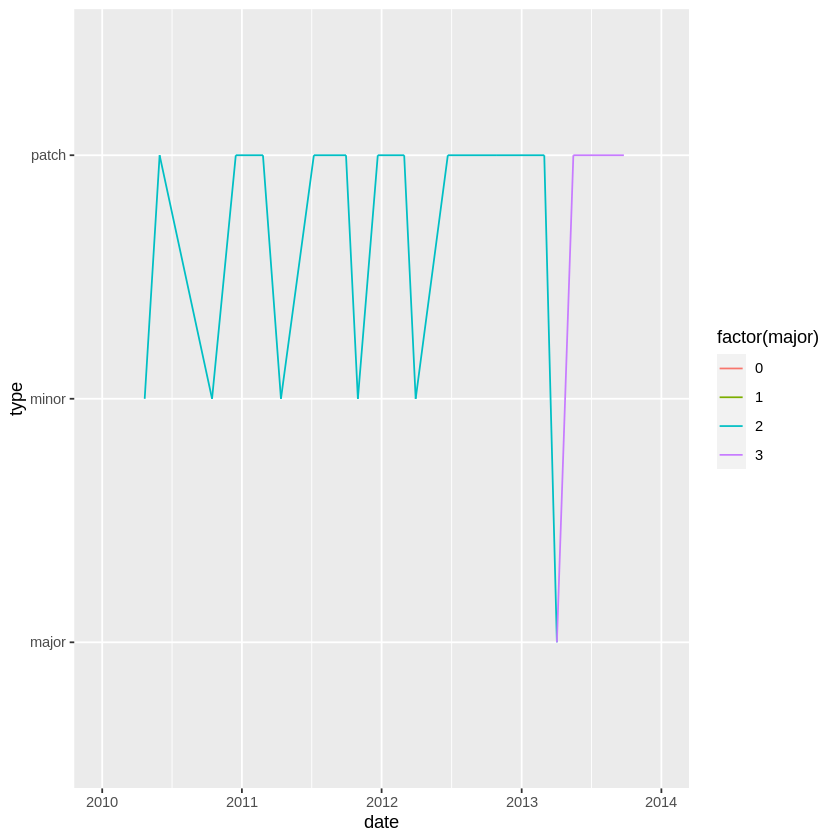

In [ ]:
# Limit the axis to between 2010-01-01 and 2014-01-01
ggplot(releases, aes(x = date, y = type)) +
  geom_line(aes(group = 1, color = factor(major))) +
  xlim(as.Date("2010-01-01"), as.Date("2014-01-01"))

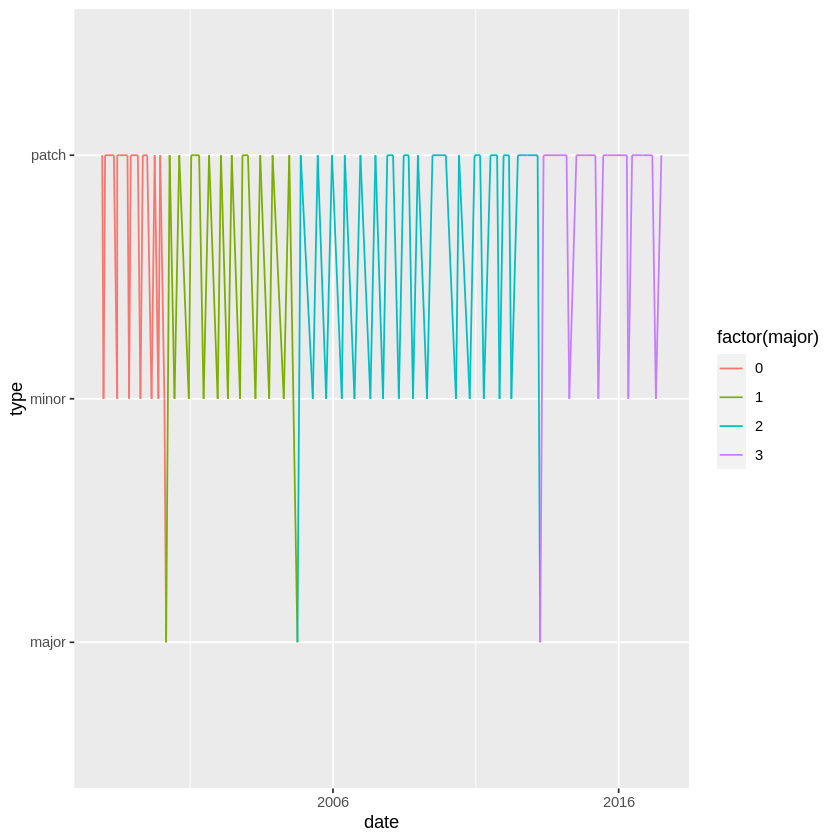

In [ ]:
# Specify breaks every ten years and labels with "%Y"
ggplot(releases, aes(x = date, y = type)) +
  geom_line(aes(group = 1, color = factor(major))) +
  scale_x_date(date_breaks = "10 years", date_labels = "%Y")

####**Opérateurs arithmétiques et logiques**

+ Les objets Date étant représentés en interne comme le nombre de jours depuis le 01-01-1970, vous pouvez effectuer des calculs et des comparaisons de base avec des dates. 

+ Vous pouvez comparer des dates avec les opérateurs logiques habituels (<, ==, >, etc.), trouver les extrêmes avec min() et max(), et même soustraire deux dates pour connaître le temps qui les sépare.

+ Dans cet exercice, vous verrez comment ces opérations fonctionnent en explorant la dernière version de R. Vous verrez **Sys.date()** dans le code, il renvoie simplement la date du jour.

####**Instructions**

+ Trouvez la date de la version la plus récente en appelant **max()** sur la colonne date dans releases.

+ Trouvez les lignes dans releases qui ont la date la plus récente, en spécifiant la comparaison **date == last_release_date dans filter()**

+ Imprimez **last_release** pour voir de quelle version il s'agit.


+ Calculez le temps écoulé depuis la dernière version en soustrayant **last_release_date de Sys.Date()**.

In [ ]:
# Find the largest date
last_release_date <- max(releases$date)

# Filter row for last release
last_release <- filter(releases, date == last_release_date)

# Print last_release
last_release

# How long since last release?
Sys.Date() - last_release_date

major,minor,patch,date,datetime,time,type
<dbl>,<dbl>,<dbl>,<date>,<dttm>,<time>,<chr>
3,4,1,2017-06-30,2017-06-30 07:04:11,07:04:11,patch


Time difference of 1990 days

###**Qu’en est-il des temps?**

####**1. Qu’en est-il des temps?**

+ Jusqu’à présent, nous n’avons parlé que de dates, mais qu’en est-il des temps? 

+ Oui, R a également des objets intégrés pour gérer les dates avec les heures, quelque chose que nous appellerons datetimes

####**2.ISO 8601**

+ ISO 8601 a également quelque chose à dire sur les dates. 

+ Tout comme les dates, si vous avez une heure d’accompagnement, elle doit être écrite de la plus grande unité à la plus petite unité en utilisant un nombre fixe de chiffres et en séparant éventuellement les unités par deux points. 

+ Lorsqu’il est combiné avec une date, l’heure est parfois préfixée par le caractère T.

####**3. Dates dans R**

+ Il existe deux types d’objets intégrés pour les dates dans R, **POSIXlt et POSIXct**. 

+ **POSIXlt stocke une date dans une liste avec des composants pour chaque unité, tandis que POSIXct stocke la date en tant que nombre de secondes depuis le début de 1970**. 

+ En raison de sa structure plus simple, POSIXct est plus susceptible d’être stocké dans des trames de données et celui sur lequel nous nous concentrerons exclusivement. 

+ Tout comme les objets Date, il existe une fonction pour prendre une chaîne et la transformer en objet POSIXct. 

+ Et peut-être sans surprise, il s’appelle (point) POSIXct. 

+ Et, tout comme les dates, comme (point) POSIXct lira dans les dates ISO 8601, mais tout le reste devra être analysé spécialement, quelque chose que vous maîtriserez dans le chapitre 2.

####**4. Fuseaux horaires**

+ ISO 8601 permet également la spécification d’un fuseau horaire. 

+ Si aucun fuseau horaire n’est spécifié, il est supposé être l’heure locale. 

+ Le suffixe sur une heure de Z, indique une heure dans le fuseau horaire UTC. 

+ **UTC est l’abréviation de Coordinated Universal Time, une norme internationale qui ne respecte pas l’heure d’été**. 

+ D’autres fuseaux horaires sont spécifiés dans l’ISO 8601 en tant que décalages par rapport à ce fuseau horaire.

+ Malheureusement, comme (point) POSIXct ne reconnaîtra pas la spécification ISO 8601 des fuseaux horaires, il assumera le fuseau horaire local, sauf si vous en définissez un autre avec l’argument tz. Vous en apprendrez plus sur les fuseaux horaires au chapitre 4.

####**5. Les dates se comportent bien aussi**

+ Une fois que vous avez des dates dans R, elles se comportent bien, tout comme les dates.
+ Vous pouvez comparer les heures de date, soustraire les heures de date et tracer les heures.

####**6. Entraînons-nous!**
+ Vous allez essayer toutes ces choses dans les exercices suivants.

###**EXERCICES**

####**Obtenir des dates dans R**

+ Tout comme les dates sans les heures, si vous voulez que R reconnaisse une chaîne de caractères comme une date, vous devez la convertir, bien que vous utilisiez maintenant **as.POSIXct()**. 

+ **as.POSIXct() s'attend à ce que les chaînes de caractères soient au format YYYY-MM-DD HH:MM:SS**.

+ La seule chose délicate est que les heures seront interprétées en heure locale en fonction de la configuration de votre machine. 

+ Vous pouvez vérifier votre fuseau horaire avec **Sys.timezone()**. 

+ Si vous souhaitez que l'heure soit interprétée dans un autre fuseau horaire, il vous suffit de définir **l'argument tz de as.POSIXct()**. Vous en apprendrez davantage sur les fuseaux horaires au chapitre 4.

+ Dans cet exercice, vous allez saisir quelques dates à la main et vous verrez que read_csv() gère aussi les dates automatiquement dans de nombreux cas.

####**Instructions**

+ Utilisez as.POSIXct() et une chaîne appropriée pour entrer la date correspondant au 1er octobre 2010 à 12:12:00.

+ Entrez à nouveau la même date, mais spécifiez maintenant le fuseau horaire "America/Los_Angeles".

+ Utilisez read_csv() pour lire à nouveau le fichier rversions.csv.

+ Examinez la structure de la colonne datetime pour vérifier que read_csv() l'a correctement interprétée comme une datetime.

In [ ]:
# Use as.POSIXct to enter the datetime 
as.POSIXct("2010-10-01 12:12:00")

# Use as.POSIXct again but set the timezone to `"America/Los_Angeles"`
as.POSIXct("2010-10-01 12:12:00", tz = "America/Los_Angeles")

# Use read_csv to import rversions.csv
releases <- read_csv("rversions.csv")

# Examine structure of datetime column
str(releases$datetime)

####**Les dates se comportent bien aussi**


+ Tout comme les objets Date, vous pouvez tracer et faire des calculs avec des objets **POSIXct**.

+ Par exemple, dans cet exercice, vous allez voir à quelle vitesse les gens téléchargent les nouvelles versions de R, en examinant les journaux de téléchargement du miroir CRAN de RStudio.

+ R 3.2.0 a été publié le "2015-04-16 07:13:33", donc cran-logs_2015-04-17.csv contient un échantillon aléatoire de téléchargements les 16, 17 et 18.

####**Instructions**

+ Utilisez read_csv() pour importer cran-logs_2015-04-17.csv.

+ Imprimez les logs pour voir les informations que nous avons sur chaque téléchargement.

+ Stocker l'heure de sortie de R 3.2.0 comme un objet POSIXct.

+ Découvrez quand la première demande de 3.2.0 a été faite en filtrant les valeurs de la colonne datetime qui sont supérieures à release_time.

+ Enfin, voyez comment les téléchargements augmentent en créant des histogrammes du temps de téléchargement pour 3.2.0 et la version précédente 3.1.3. 

+ Nous avons fourni la plupart du code, vous devez juste spécifier que l'esthétique $x$ doit être la colonne datetime.

Rows: 100000 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): r_version, country
dttm (1): datetime

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


datetime,r_version,country
<dttm>,<chr>,<chr>
2015-04-18 12:34:43,3.2.0,GB
2015-04-18 15:41:32,3.2.0,CA
2015-04-18 14:58:41,3.2.0,IE
2015-04-18 16:44:45,3.2.0,US
2015-04-18 04:34:35,3.2.0,US
2015-04-18 22:29:45,3.2.0,CH
2015-04-17 16:21:06,3.2.0,US
2015-04-18 20:34:57,3.2.0,AT
2015-04-17 18:23:19,3.2.0,US


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


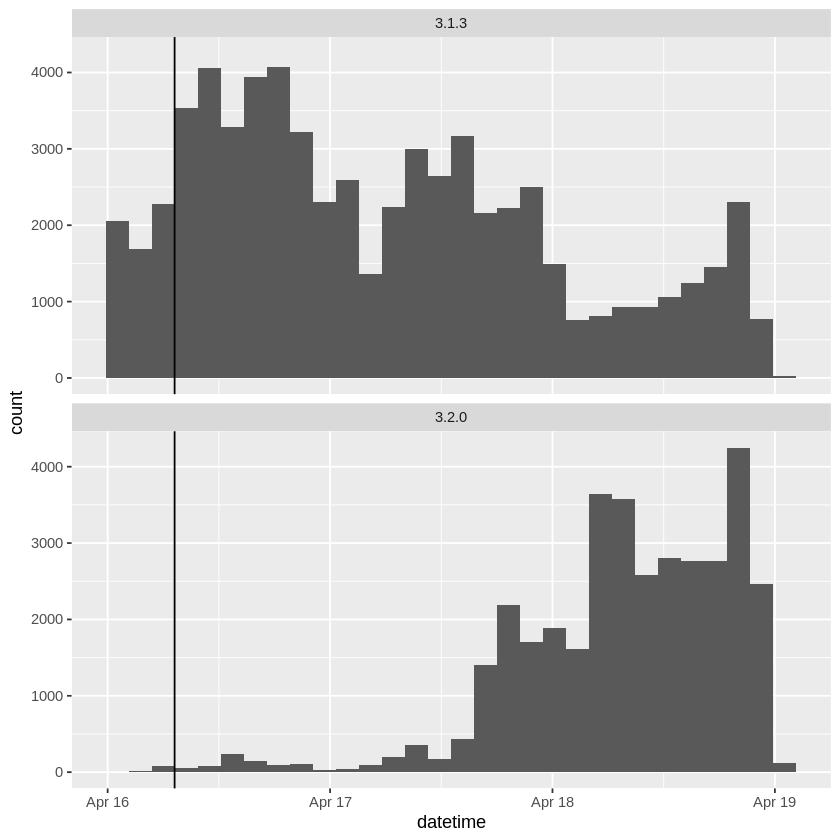

In [ ]:
# Import "cran-logs_2015-04-17.csv" with read_csv()
logs <- read_csv("/content/cran-logs_2015-04-17.csv")

# Print logs
#logs

# Store the release time as a POSIXct object
release_time <- as.POSIXct("2015-04-16 07:13:33", tz = "UTC")

# When is the first download of 3.2.0?
logs %>% 
  filter(logs$datetime > release_time,
    r_version == "3.2.0")

# Examine histograms of downloads by version
ggplot(logs, aes(x = datetime)) +
  geom_histogram() +
  geom_vline(aes(xintercept = as.numeric(release_time)))+
  facet_wrap(~ r_version, ncol = 1)

###**Pourquoi lubrifier?**

####**1. Pourquoi lubrifier?**
+ Comme vous l’avez vu, R a un support intégré pour stocker les dates et les heures, mais pour le reste du cours, vous apprendrez un **package appelé lubridate**.

####**2. Lubrifier**
+ lubridate est conçu pour rendre le travail avec les dates et les heures aussi facile que possible dans R. 

+ C’est un paquet tidyverse, ce qui signifie qu’il obéit à certains principes clés, y compris jouer bien avec les objets datetime existants de R et être conçu pour les humains, pas pour les ordinateurs. 

+ Cela signifie également qu’il s’intégrera parfaitement dans vos pipelines d’analyse de données qui utilisent d’autres outils tidyverse. 

+ En particulier, dans ce cours, vous combinerez lubridate avec dplyr et ggplot2 pour répondre à des questions sur les données qui incluent une variable datetime. 

+ Un aspect intéressant est que vous n’avez pas à vous soucier de savoir si vos heures de date sont stockées dans **des objets Date, des objets POSIXct ou même des objets de série chronologique comme zoo ou xts, les fonctions lubridate** auront un comportement cohérent. 
+ Vous n’avez besoin d’apprendre qu’une seule fonction pour tout type d’objet datetime.

####**3. Analyse d’un large éventail de formats**
+ Vous commencerez par voir à quel point lubridate permet d’analyser facilement une chaîne de caractères en un objet datetime. 

+ Bien que R ait quelques fonctions d’analyse intégrées, les fonctions de lubridate sont plus simples à utiliser, plus indulgentes pour les différents formats, et permettent même l’analyse de nombreux formats dans un vecteur.

####**4. Manipulation des dates**
+ Ensuite, vous découvrirez les fonctions de lubrification pour extraire et manipuler les composants d’une datetime. 

+ Vous pourrez extraire le mois, le jour de la semaine ou le jour de l’année à partir d’une date. 

+ Combiné avec dplyr et ggplot qui vous permettra de faire des tracés comme ce joyplot de la température quotidienne maximale par mois à Auckland.

####**5. Durées**
+ Lubridate a également des objets spéciaux pour la gestion des intervalles de temps - le temps qui s’écoule entre deux points de temps.

+ Vous apprendrez à utiliser des intervalles de temps pour générer des séquences de dates et calculer la durée des intervalles de temps comme les durées des règnes des rois et des reines d’Angleterre.

####**6. Autres caractéristiques lubrifiantes**
+ Dans le dernier chapitre, vous découvrirez les fonctions de lubrification pour gérer les fuseaux horaires, l’analyse rapide des heures de date et la sortie des heures de date.

####**7. Entraînons-nous!**
+ Prêt à commencer ? Je vous verrai dans le prochain chapitre.

###**Analyse des dates avec du lubrifiant**

####**1. Analyse des dates avec du lubrifiant**

+ Bienvenue au chapitre 2. Dans ce chapitre, vous apprendrez à utiliser le package lubridate pour analyser et manipuler les dates. 

+ Pour commencer, vous en apprendrez plus sur l’importation de dates. 

+ Nous parlerons de deux options dans le lubrification : tout un ensemble de fonctions dont les noms correspondent à différents formats, et l’parse_date_time plus général, une fonction où le format est spécifié comme argument.

####**2. ymd()**
+ Considérons une date familière du dernier chapitre: le 27 février 2013. 

+ Dans lubridate, la fonction ymd analysera une date lorsqu’elle est formatée année d’abord, puis mois, puis jour. 

+ Donc, si nous avons la date formatée selon ISO 8601, ymd l’analysera avec succès. 

+ Ce qui est génial avec ymd, c’est qu’il gère les dates qui sont dans le bon ordre, mais qui peuvent ou non être exactement ISO 8601. 

+ Par exemple, il ignore tous les séparateurs, de sorte qu’une date qui utilise des points au lieu de tirets analyse avec succès. Et les unités n’ont même pas besoin d’être numériques. Si le mois utilise l’abréviation anglaise, cela fonctionne aussi!

####**3. Amis de ymd()**
+ Ce qui est bien avec lubridate, c’est qu’il existe toute une famille de fonctions comme ymd où le nom de la fonction spécifie le format attendu de la date. 

+ Il y a dmy pour jour, mois, année, mdy pour les dates dans la forme américaine commune: mois, jour, année. Et ainsi de suite. 

+ Il existe également des fonctions comme celle-ci pour les heures de date. 

+ La partie date du nom de la fonction est suivie d’un trait de soulignement, puis de hms, hm ou s. 

+ Donc, dmy_hm lirez une date avec une heure d’accompagnement. Contrairement à certaines fonctions intégrées de R, si vous ne spécifiez pas de fuseau horaire, lubridate supposera UTC.

####**4. parse_date_time(x = ___, ordre = ___)**

+ Bien que la famille de fonctions ymd gère la plupart des dates, vous pouvez toujours rencontrer des cas où vous devez être plus précis. 

+ **La fonction parse_date_time dans lubridate**, analyse également les dates, mais vous spécifiez l’ordre dans un argument séparé. 

+ L’ordre est une chaîne qui décrit l’ordre des composants dans une date, par exemple ici c’est la chaîne dmy. 

+ **parse_date_time** dispose d’une fonctionnalité pratique où si les dates que vous devez analyser sont dans plus d’un format, vous pouvez passer dans plus d’un ordre. Il suffit de passer un vecteur de chaînes à commander.

####**5. Mise en forme des caractères**
+ Vous pouvez trouver tous les caractères de formatage possibles sur la page d’aide de **parse_date_time**. 

+ Certains vous sembleront familiers, $y$ minuscule, $m$ et $d$ correspondent à l’année, au mois et au jour. 

+ Un $Y$ majuscule est une année sans siècle. Les majuscules $H$, $M$ et $S$ sont des heures, des minutes et des secondes. 

+ Il y en a quelques autres qui sont utiles: a spécifie un jour de la semaine abrégé ou en entier, selon le cas, de même $b$ spécifie un nom de mois. 

+ La majuscule $I$ peut analyser des temps de 12 heures et est souvent utilisée avec p minuscule comme indicateur $AM / PM$. 

+ $z$ analyse les fuseaux horaires fournis sous forme de décalages en heures et minutes à partir de $UTC$.

####**6. Entraînons-nous!**
+ Maintenant, c’est votre tour, prenez ce que vous avez appris pour analyser certaines dates et heures.

###**EXERCICE**

####**Sélection de la bonne fonction d'analyse syntaxique**

+ lubridate fournit un ensemble de fonctions pour analyser les dates dans un ordre connu. Par exemple, $ymd()$ analysera les dates en commençant par l'année, suivie du mois et du jour. 

+ L'analyse est flexible, par exemple, elle analysera le m qu'il soit numérique (par exemple 9 ou 09), un nom de mois complet (par exemple septembre), ou un nom de mois abrégé (par exemple sep).

+ Toutes les fonctions avec $y$, $m$ et $d$ dans n'importe quel ordre existent. 

+ Si vos dates comportent également des heures, vous pouvez utiliser les fonctions qui commencent par $ymd, dmy, mdy$ ou $ydm$ et sont suivies de _h, _hm ou _hms.

+ Pour voir toutes les fonctions disponibles, consultez **ymd()** pour les dates et **ymd_hms()** pour les dates-temps.

+ Voici quelques défis. Dans chaque cas, nous avons fourni une date, votre travail consiste à choisir la fonction correcte pour l'analyser.

####**Instructions**

+ Pour chaque date, le format ISO 8601 est affiché sous forme de commentaire après la date, pour vous aider à vérifier votre travail.

+ Choisissez la fonction correcte pour analyser $x$.

+ Choisissez la fonction correcte pour analyser $y$.

+ Choisissez la fonction correcte pour analyser $z$.

In [ ]:
library(lubridate)

# Parse x 
x <- "2010 September 20th" # 2010-09-20
ymd(x)

# Parse y 
y <- "02.01.2010"  # 2010-01-02
dmy(y)

# Parse z 
z <- "Sep, 12th 2010 14:00"  # 2010-09-12T14:00
mdy_hm(z)

[1] "2010-09-20"

[1] "2010-01-02"

[1] "2010-09-12 14:00:00 UTC"

####**Spécification d'un ordre avec `parse_date_time()`**.

+ Et si vous avez quelque chose dans un ordre vraiment bizarre comme dym_msh ? Il n'y a pas de fonction nommée juste pour cet ordre, mais c'est là que **parse_date_time()** intervient. 

+ **parse_date_time()** prend un argument supplémentaire, orders, où vous pouvez spécifier l'ordre des composants de la date.

+ Par exemple, pour analyser "20 september 2010", vous pouvez dire 
      parse_date_time("20 septembre 2010", orders = "ymd") 
      
+ et cela équivaudrait à utiliser la fonction ymd() de l'exercice précédent.

+ Un avantage de **parse_date_time()** est que vous pouvez utiliser davantage de caractères de format. Par exemple, vous pouvez spécifier les noms des jours de la semaine avec A, I pour l'heure de 12 heures, les indicateurs am/pm avec p et bien d'autres. 

+ Vous pouvez consulter une liste complète sur la page d'aide ?**parse_date_time**.

+ Un autre grand avantage est que vous pouvez spécifier un vecteur d'ordres, ce qui permet d'analyser des dates pour lesquelles plusieurs formats peuvent être utilisés.

Vous allez l'essayer dans cet exercice.

####**Instructions**

+ $x$ est une date-heure plus délicate. Utilisez les indices dans les instructions pour analyser $x$.

+ two_orders a deux ordres différents, analysez les deux en spécifiant que l'ordre est **c("mdy", "dmy")**.

+ Analysez short_dates avec **orders = c("dOmY", "OmY", "Y")**. Que se passe-t-il avec les dates pour lesquelles aucun mois ou jour n'est spécifié ?

In [ ]:
# Specify an order string to parse x
x <- "Monday June 1st 2010 at 4pm"
parse_date_time(x, orders = "AmdyIp")

# Specify order to include both "mdy" and "dmy"
two_orders <- c("October 7, 2001", "October 13, 2002", "April 13, 2003", 
  "17 April 2005", "23 April 2017")
parse_date_time(two_orders, orders = c("mdy", "dmy"))

# Specify order to include "dOmY", "OmY" and "Y"
short_dates <- c("11 December 1282", "May 1372", "1253")
parse_date_time(short_dates, orders = c("dOmY", "OmY", "Y"))

[1] "2010-06-01 16:00:00 UTC"

[1] "2001-10-07 UTC" "2002-10-13 UTC" "2003-04-13 UTC" "2005-04-17 UTC"
[5] "2017-04-23 UTC"

[1] "1282-12-11 UTC" "1372-05-01 UTC" "1253-01-01 UTC"

####**Importer des données météorologiques quotidiennes**

+ Dans la pratique, vous n'aurez pas à analyser des dates et des heures isolées, elles feront partie d'un ensemble de données plus vaste. 

+ Tout au long du chapitre, après avoir maîtrisé une compétence à l'aide d'un exemple plus simple (les heures de sortie de R par exemple), vous mettrez en pratique vos compétences en matière de lubrification dans un contexte en travaillant avec les données météorologiques d'Auckland NZ.

+ Il y a deux ensembles de données : 

  + akl_weather_daily.csv un ensemble de résumés quotidiens sur 10 ans, et akl_weather_hourly_2016.csv des observations toutes les demi-heures pour 2016.

  + Vous importerez les données quotidiennes dans cet exercice et la météo horaire dans l'exercice suivant.

+ Vous utiliserez les fonctions de dplyr, donc si vous vous sentez rouillé, vous pouvez revoir **filter(), select() et mutate()**.

####**Instructions**

+ Importez les données quotidiennes, **"akl_weather_daily.csv" avec read_csv()**.

+ Imprimez **akl_daily_raw** pour confirmer que la colonne de date n'a pas été interprétée comme une date. Vous pouvez voir pourquoi ?

+ L'utilisation de **mutate()** écrase la colonne date avec une version analysée de date. 

+ Vous devez spécifier la fonction d'analyse syntaxique. Astuce : la première date devrait être le 1er septembre.

+ Imprimez **akl_daily** pour vérifier que la colonne date est maintenant une date.

+ Examinez les données en traçant la date sur l'axe des $x$ et la température maximale sur l'axe des $y$.

Rows: 3661 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): date, events
dbl (5): max_temp, min_temp, mean_temp, mean_rh, cloud_cover

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


date,max_temp,min_temp,mean_temp,mean_rh,events,cloud_cover
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
2007-9-1,60,51,56,75,NA,4
2007-9-2,60,53,56,82,Rain,4
2007-9-3,57,51,54,78,NA,6
2007-9-4,64,50,57,80,Rain,6
2007-9-5,53,48,50,90,Rain,7
2007-9-6,57,42,50,69,NA,1
2007-9-7,59,41,50,77,NA,4
2007-9-8,59,46,52,80,NA,5
2007-9-9,55,50,52,88,Rain,7


date,max_temp,min_temp,mean_temp,mean_rh,events,cloud_cover
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
2007-09-01,60,51,56,75,NA,4
2007-09-02,60,53,56,82,Rain,4
2007-09-03,57,51,54,78,NA,6
2007-09-04,64,50,57,80,Rain,6
2007-09-05,53,48,50,90,Rain,7
2007-09-06,57,42,50,69,NA,1
2007-09-07,59,41,50,77,NA,4
2007-09-08,59,46,52,80,NA,5
2007-09-09,55,50,52,88,Rain,7


Warning message:
“Removed 1 row containing missing values (`geom_line()`).”


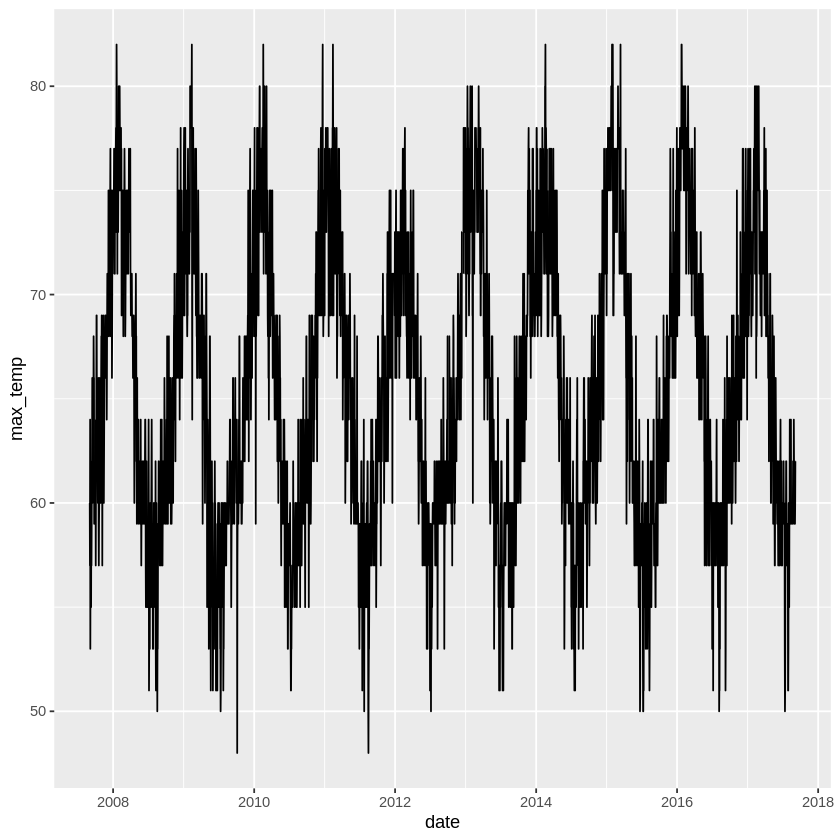

In [ ]:
library(lubridate)
library(readr)
library(dplyr)
library(ggplot2)

# Import CSV with read_csv()
akl_daily_raw <- read_csv("/content/akl_weather_daily.csv")

# Print akl_daily_raw
akl_daily_raw

# Parse date 
akl_daily <- akl_daily_raw %>%
  mutate(date = as.Date(date))

# Print akl_daily
akl_daily

# Plot to check work
ggplot(akl_daily, aes(x = date, y = max_temp)) +
  geom_line() 

####**Importer des données météorologiques horaires**


+ Les données horaires sont un peu différentes. 

+ Les informations sur la date sont réparties sur trois colonnes : 
  + année, mois et jour, vous devrez donc utiliser **make_date()** pour les combiner.

+ Ensuite, les informations relatives à l'heure se trouvent dans une colonne distincte, l'heure. 

+ Il est assez courant de trouver la date et l'heure réparties sur différentes variables. 

+ Une façon de construire les dates est de coller la date et l'heure ensemble, puis de les analyser. C'est ce que vous allez faire dans cet exercice.

####**Instructions**

+ Importez les données horaires, **"akl_weather_hourly_2016.csv"** avec **read_csv()**, puis imprimez **akl_hourly_raw** pour confirmer que la date est répartie sur l'année, le mois et le jour.

+ En utilisant mutate(), créez la colonne date avec **make_date()**.

+ Nous avons collé ensemble les colonnes date et heure. Créez datetime en analysant la colonne **datetime_string**.

+ Regardez les colonnes date, heure et datetime pour vérifier qu'elles correspondent.

+ Examinez les données en traçant datetime sur l'axe des $x$ et température sur l'axe des $y$.

Rows: 17454 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): weather, conditions, events
dbl  (5): year, month, mday, temperature, humidity
dttm (1): date_utc
time (1): time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


year,month,mday,time,temperature,weather,conditions,events,humidity,date_utc
<dbl>,<dbl>,<dbl>,<time>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dttm>
2016,1,1,00:00:00,68.0,Clear,Clear,NA,68,2015-12-31 11:00:00
2016,1,1,00:30:00,68.0,Clear,Clear,NA,68,2015-12-31 11:30:00
2016,1,1,01:00:00,68.0,Clear,Clear,NA,73,2015-12-31 12:00:00
2016,1,1,01:30:00,68.0,Clear,Clear,NA,68,2015-12-31 12:30:00
2016,1,1,02:00:00,68.0,Clear,Clear,NA,68,2015-12-31 13:00:00
2016,1,1,02:30:00,68.0,Clear,Clear,NA,68,2015-12-31 13:30:00
2016,1,1,03:00:00,68.0,Clear,Clear,NA,68,2015-12-31 14:00:00
2016,1,1,03:30:00,68.0,Cloudy,Partly Cloudy,NA,68,2015-12-31 14:30:00
2016,1,1,04:00:00,68.0,Cloudy,Scattered Clouds,NA,68,2015-12-31 15:00:00


date,time,datetime
<date>,<time>,<dttm>
2016-01-01,00:00:00,2016-01-01 00:00:00
2016-01-01,00:30:00,2016-01-01 00:30:00
2016-01-01,01:00:00,2016-01-01 01:00:00
2016-01-01,01:30:00,2016-01-01 01:30:00
2016-01-01,02:00:00,2016-01-01 02:00:00
2016-01-01,02:30:00,2016-01-01 02:30:00
2016-01-01,03:00:00,2016-01-01 03:00:00
2016-01-01,03:30:00,2016-01-01 03:30:00
2016-01-01,04:00:00,2016-01-01 04:00:00


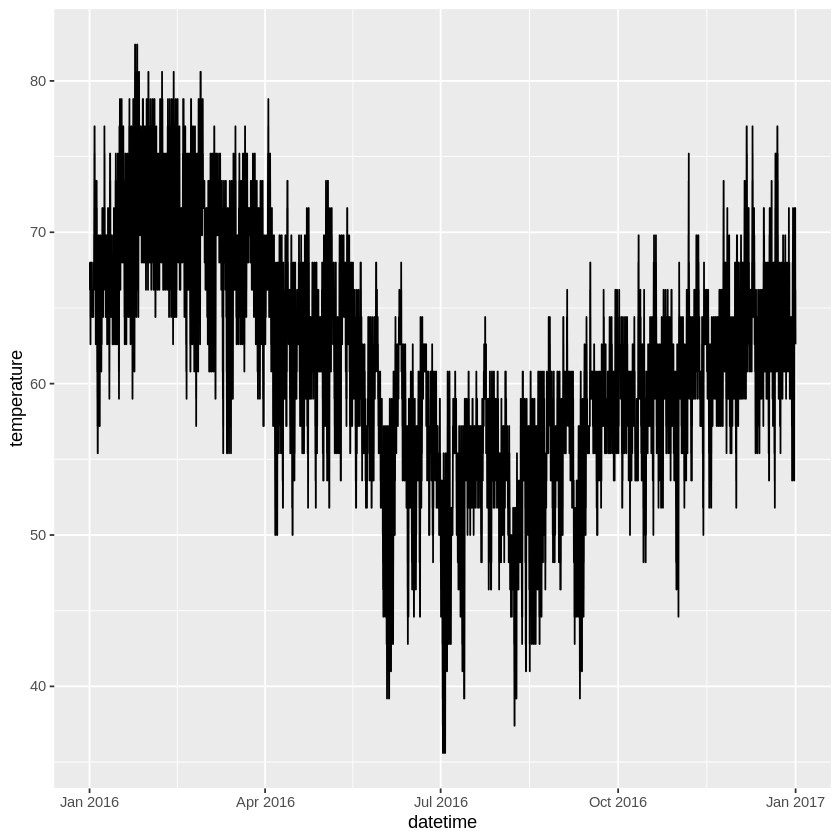

In [ ]:
library(lubridate)
library(readr)
library(dplyr)
library(ggplot2)

# Import "akl_weather_hourly_2016.csv"
akl_hourly_raw <- read_csv("/content/akl_weather_hourly_2016.csv")

# Print akl_hourly_raw
akl_hourly_raw

# Use make_date() to combine year, month and mday 
akl_hourly  <- akl_hourly_raw  %>% 
  mutate(date = make_date(year = year, month = month, day = mday))

# Parse datetime_string 
akl_hourly <- akl_hourly  %>% 
  mutate(
    datetime_string = paste(date, time, sep = "T"),
    datetime = ymd_hms(datetime_string)
  )

# Print date, time and datetime columns of akl_hourly
akl_hourly %>% select(date, time, datetime)

# Plot to check work
ggplot(akl_hourly, aes(x = datetime, y = temperature)) +
  geom_line()

###**Extraction de parties d’une datetime**

#####**1. Extraction de parties d’une datetime**

+ Une fois que vous avez des dates dans R, vous vous retrouverez souvent à les séparer à nouveau. 

+ Pourquoi? Parce que l’exploration de modèles dans le temps implique souvent de résumer à différents niveaux de résolution, comme le regroupement des données en mois ou la moyenne sur plusieurs heures.

####**2. Extraction de parties d’une datetime**

+ Dans lubrifier, extraire des composants d’une datetime est super facile, il vous suffit d’appeler la fonction avec le nom du composant que vous voulez. 

+ L’année retire l’année, le mois le mois et le jour le jour du mois. Il y a aussi heure, minute et seconde pour extraire les composants de temps.

####**3. Extraction de parties d’une datetime**

+ Quelques composants pas si évidents que vous pouvez extraire sont: 
  + **wday pour le jour de la semaine et yday pour le jour de l’année entre 1 et 365 (ou 366 dans une année bissextile)**. 
  
+ Vous pouvez également obtenir le composant de fuseau horaire avec tz.

####**4. Définition de parties d’une datetime**

+ Toutes ces fonctions extractives peuvent également être utilisées pour définir un composant, ainsi, par exemple, pour prendre la date 2013/23/02 et changer l’année en 2017, nous pouvons utiliser la fonction année sur le côté gauche d’une affectation.

####**5. Autres fonctions utiles**
+ Il existe quelques autres fonctions utiles pour accéder aux propriétés d’une datetime :
  + **leap_year, am, pm et dst** renvoient toutes des **valeurs logiques**, selon que la **datetime** est dans une année **bissextile**, est le matin, est l’après-midi ou l’heure d’été est en vigueur.
  
+ trimestre et semestre renvoient une valeur numérique identifiant le trimestre ou la moitié de l’année où une date et une heure se produit.

####**6. Entraînons-nous!**
+ Ok, il est temps de pratiquer et de voir à quel point ces fonctions peuvent être utiles.

####**Que pouvez-vous extraire ?**

+ Comme vous l'avez vu dans la vidéo, les composants d'un datetime peuvent être extraits par des fonctions lubridate portant le même nom, comme **year(), month(), day(), hour(), minute() et second()**. Elles fonctionnent toutes de la même manière, il suffit de passer une date ou un vecteur de dates.

+ Il existe également quelques fonctions utiles qui renvoient d'autres aspects d'une date, par exemple si elle se produit le matin **am()**, pendant l'heure d'été **dst()**, dans une année leap_year(), ou dans quel **quarter() ou semester()** elle se produit.

+ Essayez-les en explorant les délais de publication des versions de R à l'aide des données du chapitre 1.

####**Instructions**

+ Nous avons placé **release_time**, la colonne datetime de l'ensemble de données releases du chapitre 1, dans votre espace de travail.

+ Examinez le head() de **release_time** pour vérifier qu'il s'agit d'un vecteur de dates.


+ Extrayez le mois de release_time et examinez les premiers mois avec **head()**.


+ Pour voir quels mois ont le plus de versions, extrayez le mois puis envoyez-le dans **table()**.


+ Répétez l'opération pour voir quelles années ont le plus de versions.


+ Les versions sont-elles publiées le matin (UTC) ? Découvrez si l'heure d'une publication est inférieure à 12 et résumez avec **mean()**.

+ Vous pouvez aussi utiliser **am()** pour savoir combien de fois les publications ont lieu le matin.

In [ ]:
# Examine the head() of release_time
release_time <- releases[["datetime"]]
head(release_time)

# Examine the head() of the months of release_time
head(month(release_time))

# Extract the month of releases 
month(release_time) %>% table()

# Extract the year of releases
year(release_time) %>% table()

# How often is the hour before 12 (noon)?
mean(hour(release_time) < 12)

# How often is the release in am?
mean(am(release_time))

[1] "1997-12-04 08:47:58 UTC" "1997-12-21 13:09:22 UTC"
[3] "1998-01-10 00:31:55 UTC" "1998-03-14 19:25:55 UTC"
[5] "1998-05-02 07:58:17 UTC" "1998-06-14 12:56:20 UTC"

[1] 12 12  1  3  5  6

.
 1  2  3  4  5  6  7  8  9 10 11 12 
 5  6  8 18  5 16  4  7  2 15  6 13 

.
1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
   2   10    9    6    6    5    5    4    4    4    4    6    5    4    6    4 
2013 2014 2015 2016 2017 
   4    4    5    5    3 

[1] 0.752381

[1] 0.752381

####**Ajouter des étiquettes utiles**
+ Dans l'exercice précédent, vous avez trouvé le mois des releases :

        head(month(release_time))


+ et vous avez reçu en retour des mois numériques. Parfois, il est plus agréable (surtout pour les graphiques ou les tableaux) d'avoir des mois nommés. 

+ *Les fonctions month() et wday() (jour de la semaine) ont des arguments supplémentaires label et abbr* pour y parvenir. 

+ Définissez **label = TRUE** pour que la sortie soit étiquetée avec les noms des mois (ou des jours de la semaine), et **abbr = FALSE** pour que ces noms soient écrits en entier plutôt qu'abrégés.

+ Par exemple, essayez d'exécuter

      head(month(release_time, label = TRUE, abbr = FALSE))

+ Exercez-vous en examinant les jours de la semaine les plus populaires pour les versions de R.

####**Instructions**

+ releases est maintenant un cadre de données avec une colonne appelée datetime avec l'heure de sortie.

+ Tout d'abord, voyez ce que **wday()** fait sans étiquetage, en l'appelant sur la colonne datetime de releases et en tabulant le résultat. 

+ Savez-vous si le 1 est un dimanche ou un lundi ?


+ Répétez ce qui précède, mais utilisez maintenant les étiquettes en spécifiant l'argument label. C'est mieux, non ?


+ Stockez maintenant les jours de la semaine étiquetés dans une nouvelle colonne appelée wday.


+ Créez un graphique à barres des publications par jour de la semaine, avec des facettes par type de publication.

.
 1  2  3  4  5  6  7 
 3 29  9 12 18 31  3 

.
Sun Mon Tue Wed Thu Fri Sat 
  3  29   9  12  18  31   3 

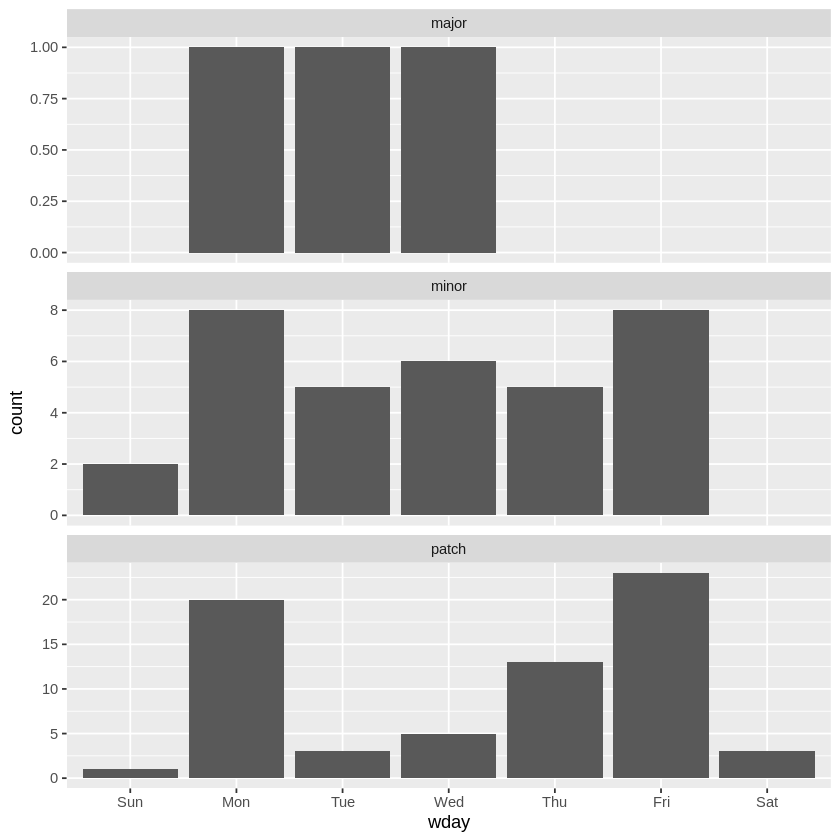

In [ ]:
library(ggplot2)

# Use wday() to tabulate release by day of the week
wday(releases$datetime) %>% table()

# Add label = TRUE to make table more readable
wday(releases$datetime, label = TRUE) %>% table()

# Create column wday to hold labelled week days
releases$wday <- wday(releases$datetime, label = TRUE)

# Plot barchart of weekday by type of release
ggplot(releases, aes(x = wday)) +
  geom_bar() +
  facet_wrap(~ type, ncol = 1, scale = "free_y")

####**Extraction pour le traçage**
+ L'extraction de composants d'une date est particulièrement utile pour l'exploration des données. 
+ Plus tôt dans ce chapitre, vous avez importé des données quotidiennes sur la météo à Auckland et créé un graphique de série chronologique de dix années de température maximale quotidienne. 
+ Bien que ce tracé vous donne un bon aperçu de l'ensemble des dix années, il est difficile de voir la tendance annuelle.

+ Dans cet exercice, vous utiliserez des éléments des dates pour explorer le schéma de la température maximale sur l'année. 
+ La première étape consiste à créer de nouvelles colonnes pour contenir les éléments extraits, puis vous les utiliserez dans quelques graphiques.

####**Instructions**

+ Utilisez **mutate()** pour créer trois nouvelles colonnes : **year, yday et month** qui contiennent respectivement les mêmes composants de la colonne date. N'oubliez pas d'étiqueter les mois avec leurs noms.

+ Créez un graphique de **yday** sur l'axe des $x$, max_temp sur l'axe des $y$ où les lignes sont groupées par année. 

+ Chaque année est une ligne sur ce graphique, l'axe des $x$ allant du 1er janvier au 31 décembre.


+ Pour voir les choses autrement, créez un graphe de lignes de crête (anciennement appelé joyplot) avec la température maximale sur l'axe des $x$, le mois sur l'axe des $y$, en utilisant **geom_density_ridges() du paquet ggridges**.

Warning message:
“Removed 1 row containing missing values (`geom_line()`).”
Warning message:
“Removed 10 rows containing non-finite values (`stat_density()`).”


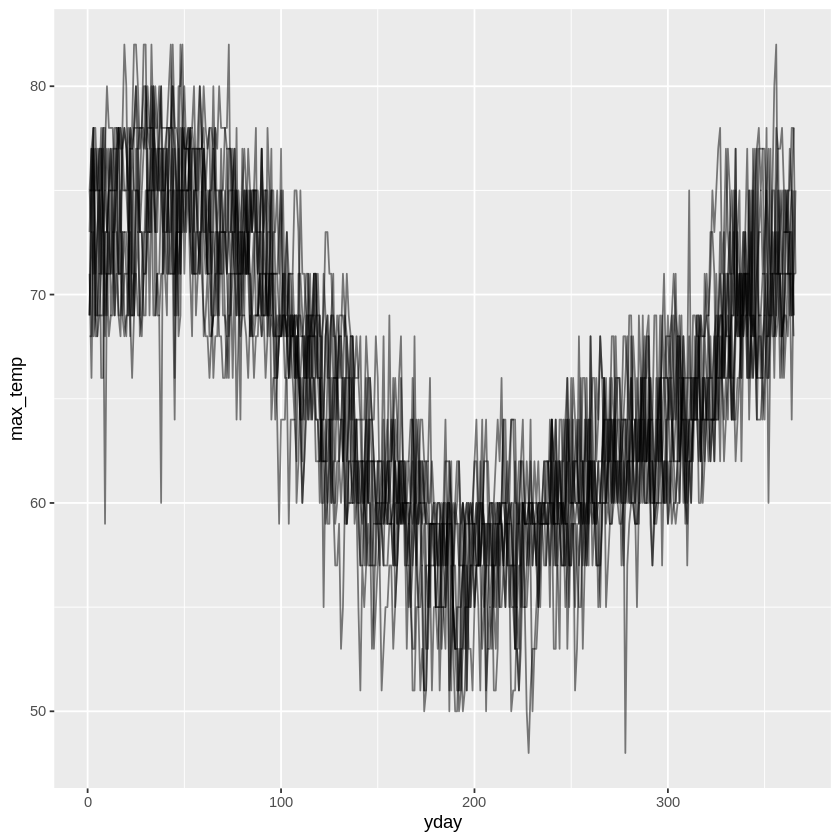

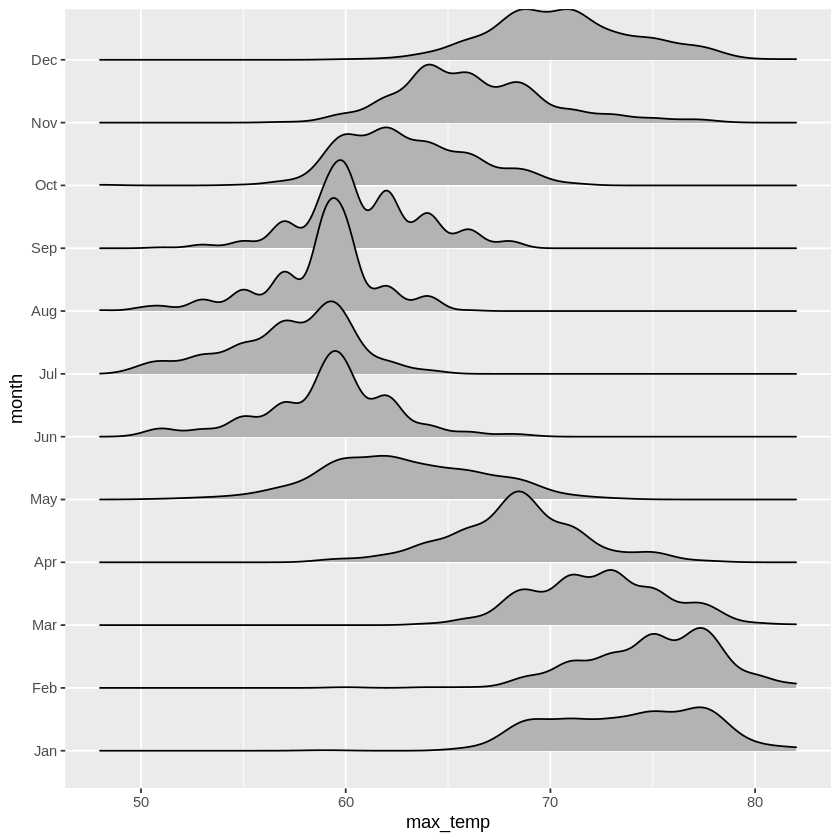

In [ ]:
library(ggplot2)
library(dplyr)
library(ggridges)

# Add columns for year, yday and month
akl_daily <- akl_daily %>%
  mutate(
    year = year(date),
    yday = yday(date),
    month = month(date, label = TRUE))

# Plot max_temp by yday for all years
ggplot(akl_daily, aes(x = yday, y = max_temp)) +
  geom_line(aes(group = year), alpha = 0.5)

# Examine distribution of max_temp by month
ggplot(akl_daily, aes(x = max_temp, y = month, height = ..density..)) +
  geom_density_ridges(stat = "density")

####**Extraire pour filtrer et résumer**

+ Une autre raison d'extraire des composants est de faciliter le filtrage des observations ou la création de résumés. 

+ Par exemple, si vous n'êtes intéressé que par les observations faites les jours de la semaine (c'est-à-dire pas le week-end), vous pouvez extraire les jours de la semaine puis filtrer les week-ends, par exemple 

      wday(date) %in% 2:6.

+ Dans le dernier exercice, vous avez vu que les mois de janvier, février et mars étaient des périodes idéales pour visiter Auckland pour des températures chaudes, mais aurez-vous besoin d'un imperméable ?

+ C'est ce que vous allez découvrir dans cet exercice ! Vous allez utiliser les données horaires pour calculer le nombre de jours où il a plu dans la journée pour chaque mois.

####**Instructions**

+ Créez de nouvelles colonnes pour l'heure et le mois de l'observation à partir de datetime. 

+ Assurez-vous d'étiqueter le mois.


+ Filtrez uniquement les observations de jour, où l'heure est supérieure ou égale à 8 et inférieure ou égale à 22.

+ Regroupez les observations d'abord par mois, puis par date, et résumez en utilisant any() sur la colonne pluie. On obtient ainsi une valeur par jour

+ Résumez à nouveau en additionnant any_rain. On obtient ainsi une valeur par mois

In [ ]:
# Create new columns hour, month and rainy
akl_hourly <- akl_hourly %>%
  mutate(
    hour = hour(datetime),
    month = month(datetime, label = TRUE),
    rainy = weather == "Precipitation"
  )

# Filter for hours between 8am and 10pm (inclusive)
akl_day <- akl_hourly %>% 
  filter(hour >= 8, hour<=22)

# Summarise for each date if there is any rain
rainy_days <- akl_day %>% 
  group_by(month, date) %>%
  summarise(
    any_rain = any(rainy)
  )

# Summarise for each month, the number of days with rain
rainy_days %>% 
  summarise(
    days_rainy = sum(any_rain)
  )

`summarise()` has grouped output by 'month'. You can override using the
`.groups` argument.


month,days_rainy
<ord>,<int>
Jan,15
Feb,13
Mar,12
Apr,15
May,21
Jun,19
Jul,22
Aug,16
Sep,25


###**Arrondir les dates**

####**1. Arrondir les dates**

+ Vous avez vu comment l’extraction des composants facilite le regroupement et la synthèse en fonction des dates et heures des observations. 

+ L’arrondi des dates joue un rôle similaire, mais est un peu différent.

####**2. Arrondi ou extraction**
+ L’arrondissement d’une date aboutit toujours à un autre objet de date du même type. 

+ Jetez un coup d’œil aux premières dates de publication dans les données de sortie. 

+ L’extraction de la composante heure avec l’heure donne l’heure mais nous perdons les autres unités plus grandes: **l’année, le mois et le jour**. 

+ En revanche, si nous utilisons **floor_date**, une fonction qui arrondit vers le bas, avec l’argument unité défini sur heure, nous supprimons la variation en minutes et en secondes mais conservons la date à laquelle l’observation a eu lieu.

####**3. Arrondi dans le lubrification**
+ Dans le lubrification, il y a trois fonctions qui arrondissent les dates :
  + **round_date** arrondit à l’unité la plus proche, 
  + **ceiling_date** arrondit vers le haut 
  + et **floor_date** lequel vous avez déjà vu des arrondis vers le bas. 
  
+ Tous les trois prennent un argument d’unité, qui spécifie l’unité à arrondir. Vous pouvez également spécifier des multiples de n’importe laquelle de ces unités.

####**4. Entraînons-nous!**
+ Il est temps pour vous de voir l’arrondi en action.

###**EXERCICE**

####**Pratique de l'arrondi**

+ Comme vous l'avez vu dans la partie, round_date() arrondit une date à la valeur la plus proche, floor_date() arrondit vers le bas, et ceiling_date() arrondit vers le haut.

+ Toutes trois prennent un argument d'unité qui spécifie la résolution de l'arrondi. 

+ Vous pouvez spécifier "seconde", "minute", "heure", "jour", "semaine", "mois", "bimestre", "trimestre", "demi-année" ou "année" ( "second", "minute", "hour", "day", "week", "month", "bimonth", "quarter", "halfyear", or "year"). 
+ Vous pouvez également spécifier un multiple de ces unités, par exemple "5 ans", "3 minutes", etc.

Essayez-les avec la date de sortie de R 3.4.1.

####**Instructions**

+ Choisissez la bonne fonction et les bonnes unités pour arrondir r_3_4_1 au jour le plus proche.

+ Choisissez la bonne fonction et les bonnes unités pour arrondir r_3_4_1 aux 5 minutes les plus proches.

+ Choisissez la bonne fonction et les bonnes unités pour arrondir r_3_4_1 à la semaine supérieure.

+ Trouvez le temps écoulé le jour de la libération au moment de la libération en soustrayant r_3_4_1 arrondi au jour inférieur de r_3_4_1.

In [ ]:
r_3_4_1 <- ymd_hms("2016-05-03 07:13:28 UTC")

# Round down to day
floor_date(r_3_4_1, unit = "day")

# Round to nearest 5 minutes
round_date(r_3_4_1, unit = "5 minutes")

# Round up to week 
ceiling_date(r_3_4_1, unit = "week")

# Subtract r_3_4_1 rounded down to day
r_3_4_1 - floor_date(r_3_4_1, unit = "day")

[1] "2016-05-03 UTC"

[1] "2016-05-03 07:15:00 UTC"

[1] "2016-05-08 UTC"

Time difference of 7.224444 hours

In [ ]:
# Create day_hour, datetime rounded down to hour
akl_hourly <- akl_hourly %>%
  mutate(
    day_hour = floor_date(datetime, unit = "hour")
  )

# Count observations per hour  
akl_hourly %>% 
  count(day_hour) 

# Find day_hours with n != 2  
akl_hourly %>% 
  count(day_hour) %>%
  filter(n != 2) %>% 
  arrange(desc(n))

day_hour,n
<dttm>,<int>
2016-01-01 00:00:00,2
2016-01-01 01:00:00,2
2016-01-01 02:00:00,2
2016-01-01 03:00:00,2
2016-01-01 04:00:00,2
2016-01-01 05:00:00,2
2016-01-01 06:00:00,2
2016-01-01 07:00:00,2
2016-01-01 08:00:00,2


day_hour,n
<dttm>,<int>
2016-04-03 02:00:00,4
2016-09-25 00:00:00,4
2016-06-26 09:00:00,1
2016-09-01 23:00:00,1
2016-09-02 01:00:00,1
2016-09-04 11:00:00,1
2016-09-04 16:00:00,1
2016-09-04 17:00:00,1
2016-09-05 00:00:00,1


###**Prise en compte des différences de dates**

####**1. Prise en compte des différences de dates**
+ Dans ce chapitre, vous découvrirez l’arithmétique avec les dates.

####**2. Arithmétique pour les dates**

+ Quel genre d’arithmétique pourriez-vous vouloir faire avec les dates? 

+ Vous pouvez soustraire des dates les unes des autres pour calculer les distances entre, ou vous pouvez ajouter une plage de temps 
  - quelque chose comme un jour, une semaine ou deux ans 
  - à une datetime pour générer une nouvelle datetime, ou vous pouvez même vouloir diviser une plage de temps par une autre, pour calculer, par exemple, combien de semaines sont dans un certain intervalle. 
  
+ Dans cette vidéo, vous reviendrez sur la soustraction des dates, avant d’en apprendre davantage sur les objets spéciaux de lubridate pour la gestion des intervalles de temps dans les vidéos ultérieures.

####**3. Soustraction des dates**
+ Dans le chapitre 1, vous avez vu que vous pouviez soustraire une date d’une autre pour calculer le temps entre elles. 

+ Par exemple, la différence entre la dernière version de R et la date actuelle fournie par la date **Sys (point)**. 
+ Dans les coulisses, c’est la fonction difftime qui effectue ce calcul, et l’utilisation explicite de difftime peut vous donner plus de contrôle sur les résultats. 

+ Pour utiliser difftime, il vous suffit de passer les deux fois pour lesquelles vous voulez la différence, et vous obtiendrez le même résultat que l’utilisation de la soustraction.

####**4. difftime()**

+ Le contrôle supplémentaire provient de l’argument units à difftime, qui spécifie l’unité de temps pour la différence. 

+ Vous pouvez spécifier n’importe laquelle des **secondes, minutes, heures, jours ou semaines**. 

+ Ainsi, nous pouvons facilement obtenir le même décalage horaire en secondes ou en semaines. 

+ Si vous ne spécifiez pas l’argument unités, difftime tentera de sélectionner les unités pour vous. Étant donné qu’il peut s’agir ou non des unités auxquelles vous vous attendez, il est recommandé de définir explicitement l’argument des unités.

####**5. now() et today()**

+ Une tâche particulièrement courante consiste à déterminer combien de temps s’est écoulé depuis un événement : 
  + peut-être depuis combien de temps vous avez exécuté un rapport important ou depuis la dernière mise à jour de vos données.
  
+ Pour ce faire, vous avez besoin de la date ou de l’heure du jour.
+ **Lubridate** fournit deux fonctions pour cela. **today** vous donne la date du jour en tant qu’objet **Date**, et maintenant vous donne ce moment même en tant qu’objet **POSIXct**, qui peuvent tous deux être utiles comme argument pour **difftime**.

####**6. Entraînons-nous!**
+ OK, il est temps d’essayer ça!

###**EXERCICE**

####**Combien de temps cela fait-il ?**
+ Pour obtenir un contrôle plus fin sur une différence entre des dates, utilisez la fonction de base **difftime()**. 
+ Par exemple, au lieu de **time1 - time2**, vous utilisez **difftime(time1, time2)**.

+ **difftime() prend un argument units** qui spécifie les unités de la différence. 
+ Vos options sont "secs", "mins", "hours", "days", ou "weeks".

+ Pour vous entraîner, vous trouverez le temps écoulé depuis que le premier homme a posé le pied sur la lune. 

+ Vous verrez également **les fonctions lubridate today() et now()** qui, lorsqu'elles sont appelées sans argument, renvoient la date et l'heure actuelles dans le fuseau horaire de votre système.

####**Instructions**

+ Apollo 11 a atterri le 20 juillet 1969. 

+ Utilisez difftime() pour trouver le nombre de jours entre today() et date_landing.

+ Neil Armstrong a posé le pied sur la surface à 02:56:15 UTC. 

+ Utilisez difftime() pour trouver le nombre de secondes entre now() et moment_step.

In [ ]:
# The date of landing and moment of step
date_landing <- mdy("July 20, 1969")
moment_step <- mdy_hms("July 20, 1969, 02:56:15", tz = "UTC")

# How many days since the first man on the moon?
difftime(today(), date_landing, units = "days")

# How many seconds since the first man on the moon?
difftime(now(), moment_step, units = "secs")

Time difference of 19502 days

Time difference of 1685016228 secs

####**Combien de secondes y a-t-il dans un jour ?**


+ Combien de secondes y a-t-il dans un jour ? Il y a 24 heures dans un jour, 60 minutes dans une heure et 60 secondes dans une minute. Il devrait donc y avoir 24*60*60 = 86400 secondes, non ?

+ Pas toujours ! Dans cet exercice, vous verrez un exemple de compteur, pouvez-vous comprendre ce qui se passe ?

####**Instructions**

+ Nous avons mis du code pour définir trois moments dans votre script - midi le 11 mars, le 12 mars et le 13 mars 2017 dans le fuseau horaire américain du Pacifique.

+ Trouvez la différence de temps entre mar_13 et mar_12 en secondes. Cela devrait correspondre à votre intuition.
+ Maintenant, trouvez la différence de temps entre mar_12 et mar_11 en secondes. Vous êtes surpris ?

In [ ]:
# Three dates
mar_11 <- ymd_hms("2017-03-11 12:00:00", 
  tz = "America/Los_Angeles")
mar_12 <- ymd_hms("2017-03-12 12:00:00", 
  tz = "America/Los_Angeles")
mar_13 <- ymd_hms("2017-03-13 12:00:00", 
  tz = "America/Los_Angeles")

# Difference between mar_13 and mar_12 in seconds
difftime(mar_13, mar_12, units = "secs")

# Difference between mar_12 and mar_11 in seconds
difftime(mar_12, mar_11, units = "secs")

Time difference of 86400 secs

Time difference of 82800 secs

###**Durées**


####**1. Durées**

+ Les durées sont difficiles parce qu’elles n’ont pas de signification constante. Vous avez vu un exemple dans l’exercice précédent. 

+ Même si nous disons que deux dates sont séparées d’un jour, cela ne signifie pas qu’elles sont exactement distantes de 86400 secondes. 

+ Pour faire de l’addition avec des dates et des intervalles de temps, vous devez être précis sur ce que vous entendez par un intervalle de temps. 

+ Par exemple, pour ajouter un jour à une datetime, vous devez définir ce que vous entendez par « un jour ».

####**2. Durées de lubrification**

+ **Lubridate** le fait en fournissant deux types de durée différents: **les périodes et les durées**. 

+ Les périodes sont conçues pour correspondre à notre concept humain d’une période de temps. 

+ Par exemple, si nous prenons une datetime et ajoutons une période d’un jour, nous obtenons la même heure le lendemain, que ce soit 86400 secondes dans le futur ou non. 

+ Les durées sont simplement une durée fixe en secondes, plus comme la façon dont un chronomètre mesure le temps. 

+ Si nous prenons une datetime et ajoutons une durée d’un jour, nous obtenons la datetime 86400 secondes dans le futur.

####**3. Création d’une période**

+ Pour créer un point en lubrification, vous utilisez la fonction de l’unité appropriée au pluriel. 

+ Par exemple, si nous voulons une période de 1 jour, nous utilisons la fonction jours. 

+ Les jours d’appel donnent lieu à une période d’une journée. 

+ Les constructeurs de point prennent un seul argument $x$ qui, par défaut, est 1, mais vous pouvez spécifier un autre multiple de la période. 

+ Une durée est construite de manière similaire, sauf que les fonctions de durée commencent toutes par d. 

+ Ainsi, pour construire une durée de 2 jours, vous utilisez la fonction ddays. 

+ Vous remarquerez que les périodes et les durées s’impriment un peu différemment pour vous rappeler leur signification.

####**4. Arithmétique avec des intervalles de temps**

+ Une fois que vous avez un intervalle de temps, vous pouvez le multiplier par un nombre, l’ajouter ou le soustraire à d’autres intervalles de temps, ou l’ajouter ou le soustraire d’une datetime.

####**5. Fonctions pour créer des intervalles de temps**
+ Il y a un constructeur pour chaque unité de temps. 

+ Rappelez-vous simplement qu’ils sont pluriels 

  - c’est-à-dire qu’ils se terminent par s et que les durées sont toujours précédées d’un d.

####**6. Entraînons-nous!**
+ Dans les exercices, vous explorerez comment les périodes et les durées diffèrent et comment vous pouvez les utiliser pour générer des séquences de dates.

###**EXERCICE**

####**Ajout ou soustraction d'un intervalle de temps à un instant donné**
+ Une utilisation courante des intervalles de temps est de les ajouter ou de les soustraire d'un moment dans le temps. 

+ Par exemple, pour calculer le temps d'un jour dans le futur à partir de mar_11 (des exercices précédents), vous pouvez faire l'une des deux choses suivantes :

      mar_11 + days(1)
      mar_11 + ddays(1)

+ Essayez-les dans la console, vous obtiendrez des résultats différents ! Mais lequel est le bon ? Cela dépend de votre intention. 

+ Si vous voulez tenir compte du fait que les unités de temps, dans ce cas les jours, ont des longueurs différentes (par exemple à cause de l'heure d'été), vous voulez une période days(). 

+ Si vous voulez que le temps se situe 86400 secondes dans le futur, vous utilisez une durée **ddays()**.

+ Dans cet exercice, vous allez ajouter et soustraire des périodes à des dates et des dates-temps.

####**Instructions**

+ Nous sommes le lundi 27 août 2018 à 14 heures et vous voulez vous rappeler à cette heure-ci la semaine prochaine d'envoyer un email. 

+ Ajoutez une période d'une semaine à mon_2pm.


+ Nous sommes le mardi 28 août 2018 à 9 heures et vous commencez un code qui prend habituellement environ 81 heures pour s'exécuter. Quand se terminera-t-il ? Ajoutez une durée de 81 heures à tue_9h.


+ Que faisiez-vous il y a cinq ans ? Soustrayez une durée de 5 ans à today().

+ Soustrayez une durée de 5 ans à today(). Cela donnera-t-il une date différente ?

In [ ]:
# Add a period of one week to mon_2pm
mon_2pm <- dmy_hm("27 Aug 2018 14:00")
mon_2pm + weeks(1)

# Add a duration of 81 hours to tue_9am
tue_9am <- dmy_hm("28 Aug 2018 9:00")
tue_9am + hours(81)

# Subtract a period of five years from today()
today() - years(5)

# Subtract a duration of five years from today()
today() - dyears(5)

[1] "2018-09-03 14:00:00 UTC"

[1] "2018-08-31 18:00:00 UTC"

[1] "2017-12-11"

[1] "2017-12-10 18:00:00 UTC"

####**Durée ou période ?**
+ Vous devez vous rappeler de soumettre une facture à un client toutes les deux semaines.
Vous aimeriez vraiment que le rappel apparaisse à 8 heures du matin, car c'est l'heure à laquelle vous commencez à travailler et vous aimez le voir en premier.

+ Devriez-vous traiter le temps entre les rappels comme une période weeks(2) ou comme une durée dweeks(2) ?

####**Instructions**


+ Une durée de 2 semaines

+ **Une période de 2 semaines**

####**Arithmétique avec les intervalles de temps**

+ Vous pouvez additionner et soustraire des durées pour créer des durées de longueur différente, et même les multiplier par des nombres. Par exemple, pour créer une durée de trois jours et trois heures, vous pouvez faire : 

      ddays(3) + dhours(3), ou 3*ddays(1) + 3*dhours(1) ou même 3*(ddays(1) + dhours(1)).

+ Il y a eu une éclipse au-dessus de l'Amérique du Nord le 2017-08-21 à 18:26:40. 

+ Il est possible de prédire la prochaine éclipse de géométrie similaire en calculant l'heure et la date un Saros(https://eclipse.gsfc.nasa.gov/SEsaros/SEsaros.html) dans le futur. 

+ Un Saros est une durée qui correspond à 223 mois synodiques, un mois synodique étant la période des phases de la Lune, soit une durée de 29 jours, 12 heures, 44 minutes et 3 secondes.

C'est ce que vous allez faire dans cet exercice !

####**Instructions**

+ Créez une durée correspondant à un mois synodique : 29 jours, 12 heures, 44 minutes et 3 secondes.

+ Créez une durée correspondant à un Saros en multipliant synodique par 223.

+ Ajoutez saros à eclipse_2017 pour prédire la prochaine éclipse.

In [ ]:
# Time of North American Eclipse 2017
eclipse_2017 <- ymd_hms("2017-08-21 18:26:40")

# Duration of 29 days, 12 hours, 44 mins and 3 secs
synodic <- ddays(29) + dhours(12) + dminutes(44) + dseconds(3)

# 223 synodic months
saros <- 223*synodic

# Add saros to eclipse_2017
saros + eclipse_2017

[1] "2035-09-02 02:09:49 UTC"

####**Génération de séquences de dates**
+ En combinant l'addition et la multiplication avec des séquences, vous pouvez générer des séquences de dates. Par exemple, vous pouvez générer une séquence de périodes allant de 1 jour à 10 jours avec la formule suivante

      1:10 * days(1)

+ Ensuite, en ajoutant cette séquence à une date spécifique, vous pouvez construire une séquence de dates allant de 1 jour à 10 jours dans le futur.
        today() + 1:10 * days(1)

+ Vous avez eu une réunion ce matin à 8 heures et vous aimeriez avoir cette réunion à la même heure et au même jour toutes les deux semaines pendant un an. Générez les heures de réunion dans cet exercice.

####**Instructions**

+ Créez **today_8am()** en ajoutant une période de 8 heures à **today()**
+ Créez une séquence de périodes à partir d'une période de deux semaines, jusqu'à 26 périodes de deux semaines.
+ Ajoutez every_two_weeks à today_8am.

In [ ]:
# Add a period of 8 hours to today
today_8am <- today() + hours(8)

# Sequence of two weeks from 1 to 26
every_two_weeks <- 1:26 * weeks(2)

# Create datetime for every two weeks for a year
every_two_weeks + today_8am

 [1] "2022-12-25 08:00:00 UTC" "2023-01-08 08:00:00 UTC"
 [3] "2023-01-22 08:00:00 UTC" "2023-02-05 08:00:00 UTC"
 [5] "2023-02-19 08:00:00 UTC" "2023-03-05 08:00:00 UTC"
 [7] "2023-03-19 08:00:00 UTC" "2023-04-02 08:00:00 UTC"
 [9] "2023-04-16 08:00:00 UTC" "2023-04-30 08:00:00 UTC"
[11] "2023-05-14 08:00:00 UTC" "2023-05-28 08:00:00 UTC"
[13] "2023-06-11 08:00:00 UTC" "2023-06-25 08:00:00 UTC"
[15] "2023-07-09 08:00:00 UTC" "2023-07-23 08:00:00 UTC"
[17] "2023-08-06 08:00:00 UTC" "2023-08-20 08:00:00 UTC"
[19] "2023-09-03 08:00:00 UTC" "2023-09-17 08:00:00 UTC"
[21] "2023-10-01 08:00:00 UTC" "2023-10-15 08:00:00 UTC"
[23] "2023-10-29 08:00:00 UTC" "2023-11-12 08:00:00 UTC"
[25] "2023-11-26 08:00:00 UTC" "2023-12-10 08:00:00 UTC"

####**Le problème délicat des mois**

+ Que doit donner ymd("2018-01-31") + months(1) ? 

+ Devrait-il s'agir de 30, 31 ou 28 jours dans le futur ? Essayez-le. 

+ En général, lubridate renvoie le même jour du mois dans le mois suivant, mais comme le 31 février n'existe pas, lubridate renvoie une valeur manquante, NA.

+ Il existe d'autres opérateurs d'addition et de soustraction : **%m+% et %m-%** qui ont un comportement différent. Plutôt que de renvoyer une valeur NA pour une date inexistante, ils reviennent à la dernière date existante.

+ Vous allez explorer leur comportement en essayant de générer une séquence pour le dernier jour de chaque mois de cette année.

####**Instructions**

+ Nous avons placé jan_31, la date du 31 janvier de cette année dans votre espace de travail.

+ Commencez par créer une séquence de 1 à 12 périodes de 1 mois.

+ Ajoutez month_seq à jan_31. Remarquez ce qui se passe pour les mois où le 31 n'existe pas.

+ Ajoutez maintenant month_seq à jan_31 en utilisant l'opérateur %m+%.

+ Essayez de soustraire month_seq de jan_31 en utilisant l'opérateur %m-%.

In [ ]:
jan_31 <- as.Date("2020-01-31")

In [ ]:
# A sequence of 1 to 12 periods of 1 month
month_seq <- 1:12 * months(1)

# Add 1 to 12 months to jan_31
jan_31 + month_seq

# Replace + with %m+%
jan_31 %m+% month_seq

# Replace + with %m-%
jan_31 %m-% month_seq


[1] NA           "2020-03-31" NA           "2020-05-31" NA          
 [6] "2020-07-31" "2020-08-31" NA           "2020-10-31" NA          
[11] "2020-12-31" "2021-01-31"

[1] "2020-02-29" "2020-03-31" "2020-04-30" "2020-05-31" "2020-06-30"
 [6] "2020-07-31" "2020-08-31" "2020-09-30" "2020-10-31" "2020-11-30"
[11] "2020-12-31" "2021-01-31"

[1] "2019-12-31" "2019-11-30" "2019-10-31" "2019-09-30" "2019-08-31"
 [6] "2019-07-31" "2019-06-30" "2019-05-31" "2019-04-30" "2019-03-31"
[11] "2019-02-28" "2019-01-31"

+ Mais utilisez ces opérateurs avec précaution, contrairement à + et -, vous risquez de ne pas récupérer x à partir de x %m+% month(1) %m-% month(1). 

+ Si vous préférez que la date soit reportée en avant, utilisez **add_with_rollback()** qui a un argument **roll_to_first**.

###**Intervalles**

####**1. Intervalles**

+ Les intervalles sont une troisième option de lubrification pour stocker des durées. 

+ Plutôt que de représenter une quantité de temps comme une période ou une durée, ils ont une date de début et de fin spécifique. 

+ Vous pouvez facilement récupérer la durée couverte par l’intervalle, sous forme de durée ou de période, mais vous pouvez également effectuer des opérations telles que tester si une autre datetime se trouve dans l’intervalle, ou même si deux intervalles se chevauchent. Regardons de plus près.

####**2. Création d’intervalles**
+ Un intervalle peut être créé à partir de deux datetimes, soit à l’aide de la fonction d’intervalle, soit de l’opérateur %--%. Voici un intervalle qui va du 5 janvier 1961 au 

+ 30 janvier 1969, créé dans les deux sens. Il se trouve que c’est l’intervalle entre le premier et le dernier concert des Beatles.

####**3. Fonctionnement sur un intervalle**

+ Lubridate fournit un certain nombre de fonctions à utiliser à intervalles réguliers. **int_start et int_end** extraire le début et la fin de l’intervalle.

####**4. Fonctionnement sur un intervalle**

+ **int_length recherche la durée de l’intervalle en secondes**, ou vous pouvez demander spécifiquement l’intervalle en tant que période ou durée avec les fonctions de durée as (point) et as (point).

####**5. Comparaison des intervalles**

+ Pour comparer une datetime à un intervalle, utilisez l’opérateur **%within%**, il retournera TRUE si la datetime se trouve à l’intérieur de l’intervalle et FALSE dans le cas contraire. 

+ Par exemple, est-ce le jour où Jimi Hendrix a joué à Woodstock à l’époque où les Beatles donnaient des concerts? Non. 

+ Pour comparer deux intervalles, utilisez **int_overlaps** qui retournera TRUE s’il y a des moments qui se trouvent à l’intérieur des deux intervalles. 

+ Vous pouvez vérifier si la période de tournée de Jimi Hendrix a chevauché celle des Beatles. Oui, on dirait que c’était le cas.

####**6. Quel genre de laps de temps?**

+ Maintenant que vous avez vu les trois types d’objets de durée de lubrification : **périodes, durées et intervalles**, vous vous demandez peut-être lequel utiliser. 

+ En général, si vous avez une datetime de début et une date heure de fin (fin), utilisez un intervalle, car c’est le moyen le plus précis de stocker l’intervalle entre deux heures de date et il est facilement converti en point ou en durée. 

+ Si vous avez à l’esprit une durée, mais sans début ou fin spécifique, vous aurez besoin d’une période ou d’une durée. 

+ Utilisez un point si l’arithmétique est plus importante reflète des constructions imposées par l’homme comme l’heure d’été ou les années bissextiles, et utilisez une durée si vous êtes plus intéressé par le nombre de secondes écoulées.

####**7. Monarques d’Angleterre**
+ Pour vous entraîner, vous travaillerez avec quelques ensembles de données. 
+ Le premier est le règne des rois et des reines d’Angleterre. 
+ Les données proviennent de Wikipédia, nous avons lu dans les dates de début et de fin de leurs règnes et mais vous calculerez la durée de leurs règnes.

####**8. La comète de Halley**
+ Les autres données que vous verrez concernent l’apparition de la comète de Halley. 
+ Ces données proviennent également de Wikipédia. 
+ Vous découvrirez quels monarques auraient pu voir la comète de Halley.

####**9. Entraînons-nous!**
+ Il est temps pour vous d’essayer les intervalles.

####**Examiner les intervalles. Règnes des rois et des reines**


+ Vous pouvez créer un intervalle en utilisant l'opérateur **%--%** avec deux dates. 

+ Par exemple, **ymd("2001-01-01") %--% ymd("2001-12-31")** crée un intervalle pour l'année 2001.

+ Une fois que vous avez un intervalle, vous pouvez trouver certaines propriétés comme son début, sa fin et sa longueur avec **int_start(), int_end() et int_length()** respectivement.

+ Exercez-vous en explorant les règnes des rois et reines de Grande-Bretagne (et de ses dominions historiques).

####**Instructions**

+ Nous avons placé les données monarchs dans votre espace de travail.

+ Imprimez monarchs pour jeter un coup d'œil aux données.

+ Créez une nouvelle colonne appelée règne qui est un intervalle entre de et à.

+ Créez une autre nouvelle colonne, length, qui est la longueur de l'intervalle de reign. 

+ Le reste du pipeline que nous avons rempli pour vous, est classé par longueur décroissante et sélectionne les colonnes nom, longueur et règne.

+ https://en.wikipedia.org/wiki/List_of_monarchs_in_Britain_by_length_of_reign
+ https://en.wikipedia.org/wiki/Halley%27s_Comet#Apparitions

In [ ]:
monarchs <- read.csv("monarchs.csv", stringsAsFactors=FALSE)

In [ ]:
# Print monarchs
 monarchs

# Create an interval for reign
monarchs <- monarchs %>%
  mutate(reign = from %--% to) 

# Find the length of reign, and arrange
monarchs %>%
  mutate(length = int_length (reign)) %>% 
  arrange(desc(length)) %>%
  select(name, length, dominion)

####**Comparaison des intervalles et des dates**

+ Une tâche courante avec les intervalles est de demander si un certain temps est à l'intérieur de l'intervalle ou s'il chevauche un autre intervalle.

+ L'opérateur %within% vérifie si la date (ou l'intervalle) de gauche est comprise dans l'intervalle de droite. Par exemple, si y2001 est l'intervalle couvrant l'année 2001,

      y2001 <- ymd("2001-01-01") %--% ymd("2001-12-31")

+ Alors 
      ymd("2001-03-30") %within% y2001 
      
+ retournera VRAI et 
      ymd("2002-03-30") %within% y2001 
      
+ retournera FAUX.

+ int_overlaps() effectue un test similaire, mais renvoie vrai si deux intervalles se chevauchent.

+ Entraînez-vous à trouver quels monarques ont vu la comète de Halley vers 1066.

####**Instructions**

+ Nous avons mis halleys un ensemble de données décrivant les apparitions de la comète de Halley dans votre espace de travail.

+ Imprimez halleys pour examiner la date. 
+ perihelion_date est la date à laquelle la comète est la plus proche du Soleil. 
+ start_date et end_date sont la plage de dates à laquelle la comète est visible depuis la Terre.
+ Créez une nouvelle colonne, visible, qui est un intervalle allant de start_date à end_date.
+ Vous allez travailler avec une seule apparition, extraire la 14ème ligne de halleys.

+ Filtrez les monarques sur ceux où halleys_1066$perihelion_date est dans le règne.

+ Filtre les monarques pour lesquels halleys_1066$visible chevauche le règne.

In [ ]:
# Print halleys
halleys

# New column for interval from start to end date
halleys <- halleys %>% 
  mutate(visible = start_date %--% end_date)

# The visitation of 1066
halleys_1066 <- halleys[14, ] 

# Monarchs in power on perihelion date
monarchs %>% 
  filter(halleys_1066$perihelion_date %within% reign) %>%
  select(name, from, to, dominion)

# Monarchs whose reign overlaps visible time
monarchs %>% 
  filter(int_overlaps(halleys_1066$visible, reign)) %>%
  select(name, from, to, dominion)

####**Conversion en durées et périodes**
+ Les intervalles sont la manière la plus spécifique de représenter un laps de temps puisqu'ils conservent des informations sur les moments exacts de début et de fin. 
+ Ils peuvent être convertis en périodes et en durées de manière exacte : il est possible de calculer à la fois le nombre exact de secondes écoulées entre la date de début et la date de fin, ainsi que le changement perçu de l'heure.

+ Pour ce faire, vous utilisez les fonctions **as.period() et as.duration()**, en utilisant un intervalle comme seul argument.

+ Essayez-les pour obtenir de meilleures représentations de la durée des règnes des monarques.

####**Instructions**

+ Créez de nouvelles colonnes pour la durée et la période qui convertissent le règne dans l'objet approprié.
+ Examinez les colonnes nom, durée et période.

In [ ]:
# New columns for duration and period
monarchs <- monarchs %>%
  mutate(
    duration = as.duration(reign),
    period = as.period(reign)) 
    
# Examine results    
monarchs %>%
  select(name, duration, period)

###**Fuseaux horaires**

####**1. Fuseaux horaires**
+ Dans ce chapitre, vous examinerez quelques autres aspects de l’utilisation des heures de date que vous pouvez rencontrer dans la pratique, en commençant par la gestion des fuseaux horaires. 

+ Les fuseaux horaires sont un moyen de suivre les différences entre les heures locales dans différents endroits. 

+ Dès que vous faites face à des moments provenant de plus d’un endroit, vous devrez vous soucier de ces différences. 

+ Vous les aurez souvent vus comme des compensations par rapport à une norme mondiale comme UTC ou Greenwich entre-temps. Par exemple, si vous demandez à google

####**2. Fuseaux horaires**
+ pour l’heure à Auckland, il est dit que c’est GMT + 13, soit 13 heures d’avance sur Greenwich Meantime. 

+ Mais dans R, pour spécifier le fuseau horaire d’une datetime, vous utilisez une chaîne de caractères.

+ Vous pouvez voir le fuseau horaire de votre système à partir de R avec la fonction Sys (point) fuseau horaire. 

+ Sur mon ordinateur portable, j’obtiens « America/Los_Angeles ». Les fuseaux horaires connus par R peuvent être répertoriés avec la fonction OlsonNames.

####**3. Fuseaux horaires IANA**
+ Il peut sembler étrange d’utiliser une région et une ville pour étiqueter un fuseau horaire plutôt qu’un simple décalage, mais rappelez-vous que les décalages peuvent changer au cours de l’année en raison de l’heure d’été, et quand, et si, les économies d’été ont pu changer au cours de l’histoire. 

+ Pour convertir un ensemble d’heures de date en un autre fuseau horaire, il faut un enregistrement complet de cet historique, et comme cette histoire n’est souvent pas spécifique à un pays, ou que les frontières des pays ont changé au fil du temps, une ville est le moyen le plus simple de l’étiqueter. 

+ Cette base de données de fuseaux horaires est gérée par l’Internet Assigned Numbers Authority, ou IANA, la même organisation qui est également responsable de la distribution des blocs d’adresses IP aux registres Internet régionaux. 

+ La base de données a été compilée à l’origine par Arthur David Olson, d’où le nom de la fonction R, OlsonNames. Vous avez déjà vu que vous pouvez définir

####**4. Paramétrage et extraction**
+ Fuseau horaire des heures de date lorsque vous les importez. 

+ Par exemple, vous avez vu celui-ci au chapitre 3.

+  Toutes les fonctions d’analyse des dates dans le lubridate comme **parse_date_time, ymd et amis, et make_date ainsi que les fonctions de base R comme (point) POSIXct et comme (point) Date peuvent prendre un argument tz**. Dans lubridate, vous pouvez utiliser la fonction tz pour extraire le fuseau horaire d’une datetime.

####**5. Manipulation des fuseaux horaires**
+ Une fois que vous avez des heures de date dans R, il y a généralement deux choses que vous voudrez peut-être faire: définir le fuseau horaire sur quelque chose de différent, ou afficher le même moment dans un fuseau horaire différent. 

+ Le fuseau horaire actuel peut être répertorié de manière incorrecte, auquel cas vous souhaitez le définir sur autre chose, sans modifier les composants de la datetime tels que les heures et les minutes. 

+ Dans le lubrification, cela se fait avec la fonction force_tz. 

+ Entrez simplement la datetime et le nouveau fuseau horaire dans l’argument tzone. 

+ Nous pouvons forcer notre mar_11 datetime à avoir le fuseau horaire de New York à la place. 

+ Il représente maintenant la même heure d’horloge, midi le 11 mars, mais à New York. 

+ D’un autre côté, le fuseau horaire est parfois correct, mais vous souhaitez afficher la datetime dans un fuseau horaire différent. 

+ Ceci est très courant lorsque vous combinez des données provenant de plusieurs zones et que vous souhaitez obtenir toutes les heures de date dans un fuseau horaire commun. 

+ Dans le lubrification, cela est géré par la fonction with_tz, et vous l’utilisez comme force_tz. Si nous regardons notre mar_11 date dans le fuseau horaire de New York, nous voyons quand il est midi dans le fuseau horaire de Los Angeles, il est déjà 15h à New York.

####**6. Entraînons-nous!**
+ Très bien, il est temps pour vous d’essayer cela.

+ https://www.fifa.com/tournaments/womens/womensworldcup

####**Réglage du fuseau horaire**

+ Si vous importez une date et qu'elle a le mauvais fuseau horaire, vous pouvez le régler avec **force_tz()**. Passez la date comme premier argument et le fuseau horaire approprié dans l'argument tzone. Rappelez-vous que le fuseau horaire doit être celui de OlsonNames().

+ Je voulais regarder la Nouvelle-Zélande lors des matchs de la Coupe du monde de football féminin en 2015, mais les heures indiquées sur le site Web de la FIFA étaient toutes des heures locales. Dans cet exercice, vous allez m'aider à définir les fuseaux horaires, puis dans le prochain exercice, vous m'aiderez à déterminer l'heure à laquelle je devais me brancher pour les regarder.

####**Instructions**

+ J'ai mis dans votre code les heures indiquées sur le site Web de la FIFA pour les matchs 2 et 3 de la phase de groupe pour la Nouvelle-Zélande.

+ Le match 2 a été joué à Edmonton. Utilisez **force_tz()** pour définir le fuseau horaire du match 2 à "America/Edmonton".

+ Le match 3 a été joué à Winnipeg. Utilisez **force_tz()** pour définir le fuseau horaire de la troisième partie sur "America/Winnipeg".

+ Découvrez combien de temps l'équipe a dû se reposer entre les deux matchs, en utilisant **as.
period()** sur l'intervalle entre game2_local et game3_local.

In [ ]:
# Game2: CAN vs NZL in Edmonton
game2 <- mdy_hm("June 11 2015 19:00")

# Game3: CHN vs NZL in Winnipeg
game3 <- mdy_hm("June 15 2015 18:30")

# Set the timezone to "America/Edmonton"
game2_local <- force_tz(game2, tzone = "America/Edmonton")
game2_local

# Set the timezone to "America/Winnipeg"
game3_local <- force_tz(game3, tzone = "America/Winnipeg")
game3_local

# How long does the team have to rest?
as.period(game2_local %--% game3_local)

[1] "2015-06-11 19:00:00 MDT"

[1] "2015-06-15 18:30:00 CDT"

[1] "3d 22H 30M 0S"

####**Visualisation dans un fuseau horaire**


+ Pour afficher une date dans un autre fuseau horaire, utilisez **with_tz()**. 

+ La syntaxe de **with_tz()** est la même que celle de **force_tz()**, en passant une date et en réglant l'argument tzone sur le fuseau horaire souhaité. 

+ Contrairement à **force_tz()**, **with_tz()** ne change pas le moment sous-jacent du temps, mais seulement la façon dont il est affiché.

+ Par exemple, la différence entre now() affiché dans le fuseau horaire "America/Los_Angeles" et "Pacific/Auckland" est de 0 :

      now <- now()
        with_tz(now, "America/Los_Angeles") - 
        with_tz(now, "Pacific/Auckland")

+ Aidez-moi à déterminer quand regarder les matchs de l'exercice précédent.

####**Instructions**

+ La plupart des fans regarderont les matchs depuis la Nouvelle-Zélande. 

+ Utilisez with_tz() pour afficher game2_local à l'heure de la Nouvelle-Zélande. 

+ La Nouvelle-Zélande est dans le fuseau horaire "Pacific/Auckland".


+ Je serai à Corvallis, dans l'Oregon. Utilisez with_tz() pour afficher game2_local à mon heure. 

+ Corvallis est dans le fuseau horaire "America/Los_Angeles".


+ Enfin, utilisez with_tz() pour afficher game3_local à l'heure de la Nouvelle-Zélande.

In [ ]:
# What time is game2_local in NZ?
with_tz(game2_local, tzone = "Pacific/Auckland")

# What time is game2_local in Corvallis, Oregon?
with_tz(game2_local, tzone = "America/Los_Angeles")

# What time is game3_local in NZ?
with_tz(game3_local, tzone = "Pacific/Auckland")

[1] "2015-06-12 13:00:00 NZST"

[1] "2015-06-11 18:00:00 PDT"

[1] "2015-06-16 11:30:00 NZST"

####**Les fuseaux horaires dans les données météorologiques**
+ Avez-vous déjà remarqué que dans les données météorologiques horaires d'Auckland, il y avait une autre colonne de date, date_utc ? Jetez-y un coup d'oeil :

        tibble::glimpse(akl_hourly)

+ La colonne datetime que vous avez créée représente l'heure locale à Auckland, NZ. 

+ Je soupçonne que cette colonne supplémentaire, date_utc, représente l'heure d'observation en UTC (le nom semble être un indice important). Mais est-ce vraiment le cas ?

+ Utilisez vos nouvelles connaissances sur les fuseaux horaires pour le découvrir.

####**Instructions**

+ Les données sont disponibles dans le cadre de données akl_hourly.

+ Dans quel fuseau horaire se trouvent actuellement datetime et date_utc ? Examinez l'en-tête des colonnes datetime et date_utc pour le savoir.
+ Corrigez datetime pour avoir le fuseau horaire de "Pacific/Auckland".
+ Réexaminez l'en-tête de la colonne datetime pour vérifier que les heures ont la même heure, mais sont maintenant dans le bon fuseau horaire.
+ Maintenant, calculez la différence entre les colonnes datetime et date_utc. Elle devrait être nulle si notre hypothèse était correcte.

In [ ]:
# Examine datetime and date_utc columns
head(akl_hourly$datetime)
head(akl_hourly$date_utc)
  
# Force datetime to Pacific/Auckland
akl_hourly <- akl_hourly %>%
  mutate(
    datetime = force_tz(datetime, tzone = "Pacific/Auckland"))

# Reexamine datetime
head(akl_hourly$datetime)
  
# Are datetime and date_utc the same moments
table(akl_hourly$datetime - akl_hourly$date_utc)

[1] "2016-01-01 00:00:00 UTC" "2016-01-01 00:30:00 UTC"
[3] "2016-01-01 01:00:00 UTC" "2016-01-01 01:30:00 UTC"
[5] "2016-01-01 02:00:00 UTC" "2016-01-01 02:30:00 UTC"

[1] "2015-12-31 11:00:00 UTC" "2015-12-31 11:30:00 UTC"
[3] "2015-12-31 12:00:00 UTC" "2015-12-31 12:30:00 UTC"
[5] "2015-12-31 13:00:00 UTC" "2015-12-31 13:30:00 UTC"

[1] "2016-01-01 00:00:00 NZDT" "2016-01-01 00:30:00 NZDT"
[3] "2016-01-01 01:00:00 NZDT" "2016-01-01 01:30:00 NZDT"
[5] "2016-01-01 02:00:00 NZDT" "2016-01-01 02:30:00 NZDT"


-82800      0   3600 
     2  17450      2 

####**Heures sans date**
+ Pendant toute la durée de ce cours, si vous avez jamais eu une heure, elle a toujours été accompagnée d'une date, c'est-à-dire d'une heure. Mais parfois, vous avez simplement une heure sans date.

+ Si vous vous trouvez dans cette situation, le paquetage hms fournit une classe d'objets hms pour contenir les temps sans date, et le meilleur endroit pour commencer serait avec **as.hms()**.

+ En fait, vous avez déjà vu un objet de la classe hms, mais je ne vous l'ai pas montré. Jetez-y un coup d'oeil dans cet exercice.

####**Instructions**

+ Utilisez read_csv() pour lire "akl_weather_hourly_2016.csv".

+  readr connaît la classe **hms**, donc s'il rencontre quelque chose qui ressemble à une heure, il l'utilisera.


+ Dans ce cas, la colonne d'heure a été analysée comme une heure sans date. Jetez un coup d'oeil à la structure de la colonne d'heure pour vérifier qu'elle a la classe hms.


+ Les objets hms s'impriment comme les heures. Vérifiez en examinant l'en-tête de la colonne de temps.


+ Vous pouvez également utiliser les objets hms dans les graphiques. Créez un graphique avec le temps sur l'axe des x, la température sur l'axe des y, avec des lignes groupées par date.

Rows: 17454 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): weather, conditions, events
dbl  (5): year, month, mday, temperature, humidity
dttm (1): date_utc
time (1): time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


 'hms' num [1:17454] 00:00:00 00:30:00 01:00:00 01:30:00 ...
 - attr(*, "units")= chr "secs"


00:00:00
00:30:00
01:00:00
01:30:00
02:00:00
02:30:00

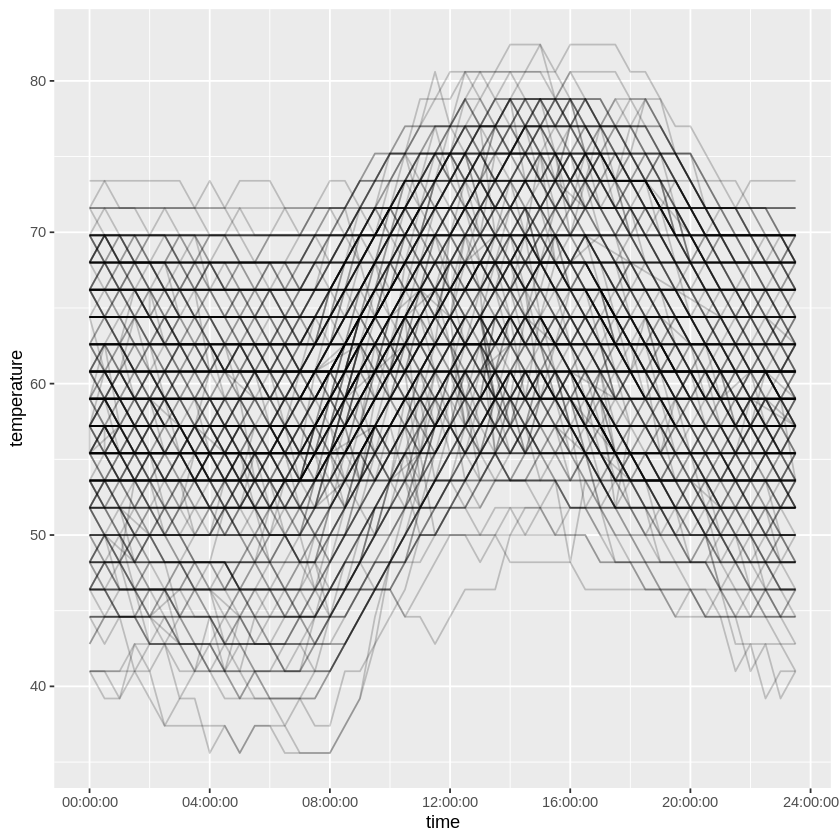

In [ ]:
# Import auckland hourly data 
akl_hourly <- read_csv("/content/akl_weather_hourly_2016.csv")

# Examine structure of time column
str(akl_hourly$time)

# Examine head of time column
head(akl_hourly$time)

# A plot using just time
ggplot(akl_hourly, aes(x = time, y = temperature)) +
  geom_line(aes(group = make_date(year, month, mday)), alpha = 0.2)

###**En savoir plus sur l’importation et l’exportation des dates**

####**1. En savoir plus sur l’importation et l’exportation des dates**


+ À présent, vous êtes assez bon pour obtenir des dates et des heures dans R, mais il y a quelques autres choses que vous devriez savoir, comment le faire rapidement et comment sortir des dates dans un format lisible par l’homme.

####**2. Analyse rapide**

+ Vous avez vu à quel point parse_date_time est un moyen très flexible et indulgent d’importer des dates dans R. 

+ Mais cette facilité d’utilisation a un coût, elle peut être un peu lente. 

+ Pourquoi? Parce que dans les coulisses, parse_date_time fait beaucoup de travail pour interpréter exactement comment les dates sont représentées et quel format est utilisé pour chaque date. 

+ Si vos dates sont dans un format cohérent, ou encore mieux le format standard ISO 8601, il existe des moyens de les lire plus rapidement. La première est la fonction fastPOSIXct dans le package fasttime. 

+ Son utilisation consiste à lire les dates formatées dans l’ordre standard: année, mois, jour, heure, minute, seconde. Parce qu’il est pointilleux sur le format, il peut être extrêmement rapide.

####**3. fast_strptime()**

+ Une autre option pour une analyse rapide est la fonction fast_strptime dans le lubrification. 

+ Cela fonctionne un peu comme parse_date_time, mais au lieu d’un argument d’ordre, il prend un argument de format. 

+ Comme l’ordre, le format est une chaîne de caractères qui décrit la façon dont les dates sont formatées, mais elle est beaucoup moins indulgente. 

+ Comparez les arguments order et format pour l’analyse de cette date. 

+ Dans fast_strptime les composants doivent être préfixés d’un % et vous devez inclure explicitement les séparateurs (les tirets dans ce cas). 

+ Les caractères composant sont également interprétés de manière beaucoup plus stricte. 

+ Alors que dans parse_date_time, un y minuscule analysera une année avec ou sans le siècle, dans fast_strptime vous devez spécifier l’année ici avec un Y majuscule car il inclut le siècle. Ce type de chaîne de format est le même que celui utilisé par les fonctions de base R strptime et strftime. Regarder leur aide est le meilleur moyen d’en savoir plus sur le format.

####**4. Exportation des dates**
+ Nous avons beaucoup parlé de l’importation des dates, mais que se passe-t-il si vous souhaitez les exporter ou les imprimer de manière agréable sur un rapport. 

+ Si vous enregistrez un jeu de données avec datetimes pour une utilisation ultérieure, il est utile de savoir write_csv du package readr écrira datetime au format ISO 8601, ce qui signifie qu’ils sont facilement lus à nouveau avec read_csv.

####**5. Mise en forme des dates**
+ Un problème légèrement différent est lorsque vous voulez sortir une date d’une manière agréable pour la consommation humaine, peut-être comme horodatage sur un rapport. 

+ La façon la plus simple de le faire est d’utiliser la fonction tampon dans le lubrification. Vous passez un exemple de date formatée comme vous le souhaitez. 

+ Par exemple, ici, je veux le jour de la semaine, suivi du nom du mois, puis du jour numérique du mois et de l’année. 

+ stamp renvoie une fonction que vous pouvez ensuite appliquer à n’importe quel objet DateTime pour le formater de cette façon. 

+ Si vous jetez un coup d’œil à votre fonction renvoyée, vous verrez que tout ce qu’elle fait est de passer la chaîne de format identifiée à la fonction de format R de base. 

+ Si stamp ne choisit pas le bon format, utilisez format, en transmettant explicitement un argument format, tout comme celui utilisé par **fast_strptime**.

####**6. Entraînons-nous!**
+ Ok, il est temps de s’entraîner à lire rapidement les heures de date et à exporter les heures.

###**EXERCICES**

####**Analyse rapide avec fasttime**

+ Le paquetage fasttime fournit une seule fonction **fastPOSIXct()**, conçue pour lire les dates formatées selon la norme **ISO 8601**. 

+ Comme elle ne lit qu'un seul format, et qu'elle n'a pas à en deviner un, elle est vraiment rapide !

+ Vous le verrez dans cet exercice en comparant la vitesse à laquelle il lit les dates des données météorologiques horaires d'Auckland (plus de 17 000 dates) à celle de lubridates ymd_hms().

+ Pour comparer les temps d'exécution, vous utiliserez la **fonction microbenchmark()** du paquetage du même nom. Vous passez autant d'arguments que vous voulez, chacun étant une expression du temps.

####**Instructions**

+ Nous avons chargé les dates des données horaires d'Auckland sous forme de chaînes de caractères dans le vecteur dates.

+ Examinez la structure des dates pour vérifier qu'il s'agit d'une chaîne de caractères et du format ISO 8601.


+ Analysez les dates avec fasttime et passez-les à str() pour vérifier que fastPOSIXct les analyse correctement.


+ Maintenant pour comparer le timing, appelez microbenchmark où le premier argument utilise ymd_hms() pour analyser les dates et le second utilise fastPOSIXct().

In [ ]:
install.packages("microbenchmark")
install.packages("fasttime")

In [ ]:
library(microbenchmark)
library(fasttime)

In [ ]:
help(read.table)

In [ ]:
data <- read.delim("/content/dates.txt", sep="", header=FALSE)
#head(data)
dates <- data %>%
  select(-V1) 

In [ ]:
head(dates)

In [ ]:
library(microbenchmark)
library(fasttime)

# Examine structure of dates
str(dates)

# Use fastPOSIXct() to parse dates
fastPOSIXct(dates) %>% str()

# Compare speed of fastPOSIXct() to ymd_hms()
microbenchmark(
  ymd_hms = ymd_hms(dates),
  fasttime = fastPOSIXct(dates),
  times = 20)

'data.frame':	5818 obs. of  3 variables:
 $ V2: chr  "2015-12-31T11:00:00Z" "2015-12-31T12:30:00Z" "2015-12-31T14:00:00Z" "2015-12-31T15:30:00Z" ...
 $ V3: chr  "2015-12-31T11:30:00Z" "2015-12-31T13:00:00Z" "2015-12-31T14:30:00Z" "2015-12-31T16:00:00Z" ...
 $ V4: chr  "2015-12-31T12:00:00Z" "2015-12-31T13:30:00Z" "2015-12-31T15:00:00Z" "2015-12-31T16:30:00Z" ...
 POSIXct[1:3], format: NA NA NA


Warning message:
“All formats failed to parse. No formats found.”
Warning message:
“All formats failed to parse. No formats found.”
Warning message:
“All formats failed to parse. No formats found.”
Warning message:
“All formats failed to parse. No formats found.”
Warning message:
“All formats failed to parse. No formats found.”
Warning message:
“All formats failed to parse. No formats found.”
Warning message:
“All formats failed to parse. No formats found.”
Warning message:
“All formats failed to parse. No formats found.”
Warning message:
“All formats failed to parse. No formats found.”
Warning message:
“All formats failed to parse. No formats found.”
Warning message:
“All formats failed to parse. No formats found.”
Warning message:
“All formats failed to parse. No formats found.”
Warning message:
“All formats failed to parse. No formats found.”
Warning message:
“All formats failed to parse. No formats found.”
Warning message:
“All formats failed to parse. No formats found.”
Warning me

expr,time
<fct>,<dbl>
ymd_hms,81323880
ymd_hms,82319956
fasttime,68105965
ymd_hms,78487722
ymd_hms,80454904
fasttime,64749698
ymd_hms,83093607
fasttime,65638068
fasttime,73628388


####**Analyse rapide avec lubridate::fast_strptime**


+ lubridate fournit son propre analyseur rapide de date : fast_strptime(). Au lieu de prendre un argument d'ordre comme parse_date_time(), il prend un argument de format et le format doit être conforme au style strptime().

+ Comme vous l'avez vu dans la vidéo, cela signifie que tout caractère représentant un composant de date doit être préfixé par un % et que tout caractère non espace doit être explicitement inclus.

+ Essayez d'analyser les dates avec fast_strptime() et comparez ensuite sa vitesse aux autres méthodes que vous avez vues.

####**Instructions**

+ dates est de nouveau dans votre espace de travail.

+ Examinez la tête de dates. Quels composants sont présents ? Quels séparateurs sont utilisés ?
Analysez les dates avec fast_strptime() en spécifiant la chaîne de format appropriée.
Comparez le timing de fast_strptime() à celui de fasttime et ymd_hms().

In [ ]:
# Head of dates
head(dates)

# Parse dates with fast_strptime
fast_strptime(dates, 
    format = "%Y-%m-%dT%H:%M:%SZ") %>% str()

# Comparse speed to ymd_hms() and fasttime
microbenchmark(
  ymd_hms = ymd_hms(dates),
  fasttime = fastPOSIXct(dates),
  fast_strptime = fast_strptime(dates, 
    format = "%Y-%m-%dT%H:%M:%SZ"),
  times = 20)

####**Produire de jolies dates et heures**

+ Une façon simple d'afficher des dates est d'utiliser la fonction stamp() de lubridate. 

+ stamp() prend une chaîne de caractères qui doit être un exemple de la façon dont la date doit être formatée, et renvoie une fonction qui peut être utilisée pour formater des dates.

+ Dans cet exercice, vous vous entraînerez à produire la fonction today() de manière agréable.

####**Instructions**

+ Créez un timbre() basé sur la chaîne de caractères "Saturday, Jan 1, 2000".


+ Imprimez date_stamp. Remarquez que c'est une fonction.


+ Passez today() à date_stamp pour formater la date du jour.


+ Affichez maintenant la date du jour en format américain MM/JJ/AAAA.


+ Enfin, utilisez le timbre basé sur la chaîne finie que j'ai placée dans votre espace de travail pour formater today().

In [ ]:
finished <- "I finished 'Dates and Times in R' on Thursday, September 4, 2017!"

In [ ]:
# Create a stamp based on "Saturday, Jan 1, 2000"
date_stamp <- stamp("Saturday, Jan 1, 2000")

# Print date_stamp
date_stamp 

# Call date_stamp on today()
date_stamp(today())

# Create and call a stamp based on "12/31/1999"
stamp("12/31/1999")(today())

# Use string finished for stamp()
stamp(finished)(today())